In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
import sys
sys.path.insert(0, '../../scripts/')
from common_funcs import list_intersection, save_list, read_list, common_index

In [4]:
clusts = open('../../data/ref/cluster_list.txt').read().split('\n')

In [5]:
test_types = !ls ../../data/outputs/gex_de_results/

In [6]:
fdr_thresh = .05

In [7]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [8]:
spec_use = species + ['all']

# show for each pair

In [9]:
pairs_use = [('human', 'macaque'), ('human', 'marmoset'), ('human', 'mouse'), ('macaque', 'marmoset'), ('macaque', 'mouse'), ('marmoset', 'mouse')]

In [10]:
from scipy.stats import spearmanr

In [11]:
out_f = '../../data/outputs/atac_de_results/human_origin/lrt/aggregate/{1}_v_{2}_logfc.tsv'

In [12]:
out_f2 = '../../data/outputs/atac_de_results/primate_conserved/lrt/aggregate/{0}_v_{1}_logfc.tsv'

../../data/outputs/atac_de_results/human_origin/lrt/aggregate/human_v_macaque_logfc.tsv
../../data/outputs/atac_de_results/human_origin/lrt/aggregate/human_v_marmoset_logfc.tsv
../../data/outputs/atac_de_results/human_origin/lrt/aggregate/macaque_v_marmoset_logfc.tsv


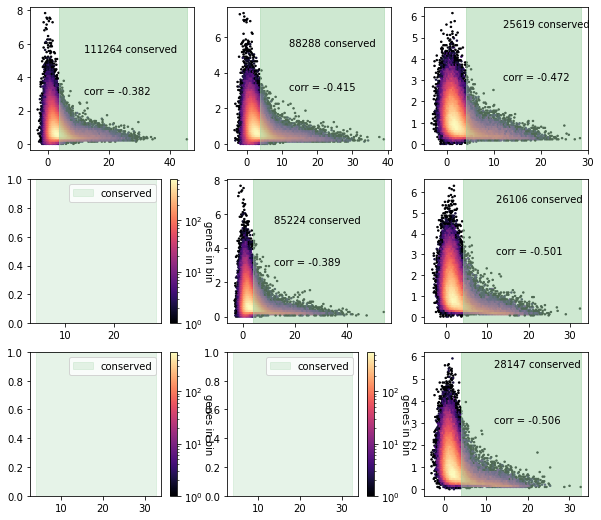

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
# param_use = 
pairs = []
for specie in species[:-1]:
    for specie_2 in species[1:]:
        pairs.append((specie, specie_2))

cov_p = []
cov_a = []
cons_p = []
cons_a = []
test_use = 'lrt'
max_t_stat = 1e6
axs = axs.flatten()
idx = 0
for ax, pair in zip(axs, pairs):
    if pair not in pairs_use:
        ax.axvspan(min_t, max_t, color='#9ED3A4', alpha=0.25, label='conserved')
        ax.legend()
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
        continue
    if pair not in pairs_use:
        continue
    spec1, spec2 = pair
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        check = out_f.format('human', spec1, spec2)
        !ls $check
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = pd.concat([de1, de])
        
    cov_a.append(stats.index)
    cons_a.append(stats.index[stats.fdr < fdr_thresh])
    if "mouse" not in pair:
        cons_p.append(stats.index[stats.fdr < fdr_thresh])
        cov_p.append(stats.index)
    
    
    stats, de = common_index(stats, de)
    min_t = stats.t_val.loc[stats.fdr < .05].abs().min()
    max_t = np.min([stats.t_val.loc[stats.fdr < .05].max(), max_t_stat])
    
    x = stats.t_val
    y = de.abs().mean(axis=1)
    max_fc = y.max()
    use = x < max_t_stat
    r = spearmanr(x[use], y[use], nan_policy='omit')[0]
    im = ax.hexbin(x[use], y[use], cmap='magma', bins='log', rasterized=True)

    ax.axvspan(min_t, max_t, color='#9ED3A4', alpha=0.5, label='conserved')
    # ax.legend()
    # ax.set_xlabel('generalize least squares t statistic')
    # ax.set_ylabel('maximum absolute log fold change')
    ax.text(12, 5.5, '{} conserved'.format(stats.t_val.loc[stats.fdr < .05].shape[0]))
    ax.text(12, 3, 'corr = {0:.3f}'.format(r))
plt.savefig("../../figures/atac_cons_vs_div_pairwise.pdf", transparent=True, dpi=400)

In [14]:
a = list_intersection(cons_a)

In [15]:
b = list_intersection(cons_p)

In [16]:
len(a), len(b)

(16189, 52947)

In [17]:
save_list('/home/ethan/work/projects/mammalian_motor_cortex_comparative/03_atac/data/outputs/atac_levels/level_3/human_origin_all_conserved.txt', a)
save_list('/home/ethan/work/projects/mammalian_motor_cortex_comparative/03_atac/data/outputs/atac_levels/level_3/human_origin_primate_conserved.txt', np.setdiff1d(b, a))

878702

In [18]:
fdr_thresh = .05

In [19]:
for origin in species[1:]:
    cov_p = []
    cov_a = []
    cons_p = []
    cons_a = []
    for pair in pairs_use:
        spec1, spec2 = pair
        stats = pd.read_csv('../../data/outputs/atac_gls_results/{}_origin/log2cpm/gls_{}_{}.tsv'.format(origin, spec1, spec2), sep='\t').set_index(origin)
        # stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        cov_a.append(stats.index)
        cons_a.append(stats.index[stats.fdr < fdr_thresh])
        print(np.sum(stats.fdr < fdr_thresh))
        if "mouse" not in pair:
            cons_p.append(stats.index[stats.fdr < fdr_thresh])
            
            cov_p.append(stats.index[stats.fdr < fdr_thresh])
    a = list_intersection(cons_a)   
    p = list_intersection(cons_p)
    print(len(a), len(p), origin)
    save_list('../../data/outputs/atac_levels/level_3/{}_origin_all_conserved.txt'.format(origin), a)
    save_list('../../data/outputs/atac_levels/level_3/{}_origin_primate_conserved.txt'.format(origin), np.setdiff1d(p, a))
    

76019
59536
25208
63430
27344
28389
16271 38817 macaque
57708
52501
21940
61105
25510
28950
15170 34081 marmoset
52097
46543
23176
46321
23256
25487
14153 29252 mouse


In [20]:
out_f = '../../data/outputs/atac_de_results/human_origin/lrt/aggregate/{1}_v_{2}_logfc.tsv'

In [21]:
out_f = '../../data/outputs/atac_de_results/human_origin/lrt/aggregate/{1}_v_{2}_logfc.tsv'

309243 309105


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 309243 and the array at index 1 has size 309105

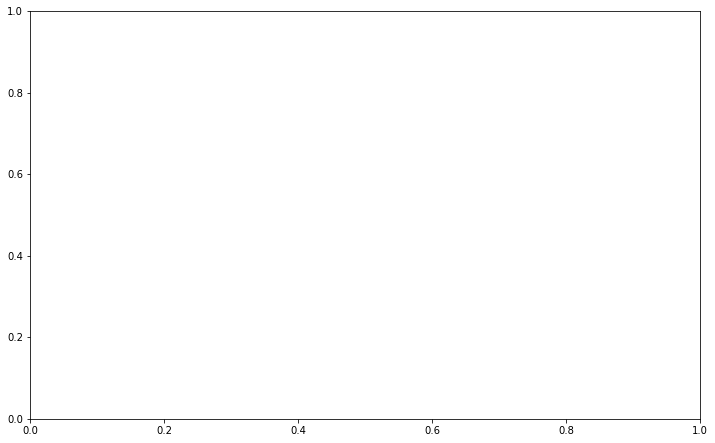

In [25]:
fig, ax = plt.subplots(figsize=(4*3, 2.5*3))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = pd.concat([de1, de])
    stats, de = common_index(stats, de)
    if 'human' in pair:
        # if 'macaque' in pair:
            div.append(de['ASC'].abs())
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')

309243 309243


Text(0.5, 1.0, 'four species mean GLS vs mean LogFC')

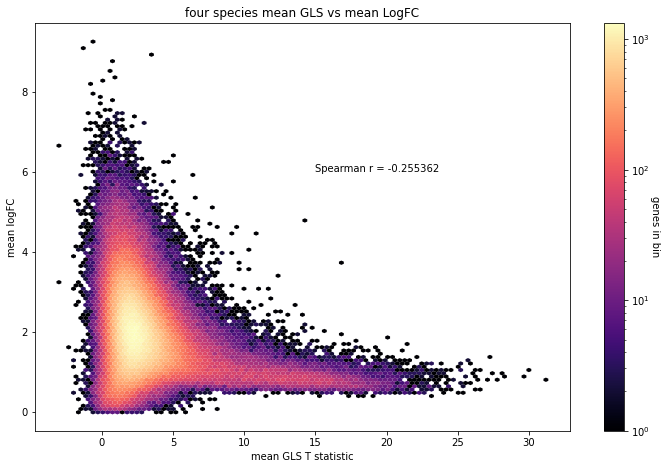

In [31]:
fig, ax = plt.subplots(figsize=(4*3, 2.5*3))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = pd.concat([de1, de])
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')
# plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

In [32]:
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        # de = pd.read_csv(out_f2.format(spec1, spec2),
        #              sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = de1 # pd.concat([de1, de])
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
# plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

183394 183394


In [33]:
l3 = read_list('../../data/outputs/atac_levels/level_3/{}_origin_all_conserved.txt'.format('human'))

In [34]:
annot = pd.read_csv('../../../fig2/data/outputs/atac_levels/atac_summary_table.tsv', sep='\t').set_index('shortname')

In [37]:
l2 = annot.loc[annot.mammal_level2].index

In [38]:
l1 = annot.loc[annot.level1_mammal].index

In [41]:
de_out = '/home/ethan/work/projects/mammalian_motor_cortex_comparative/03_atac/data/processed/da_peak_list/human_4fold/human_up/'
files =!ls {de_out}human* | grep -v 'mixed'
de_list = [read_list(file) for file in files]
de_list = np.unique(np.concatenate(de_list))
de_list = de_list[1:]

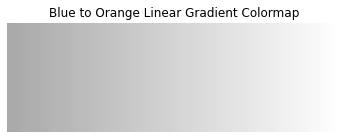

In [42]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
cmap_name = 'darkgraywhite'
colors = [(0, "darkgray"), (1, "white")]
n_bins = 100  # Discretizes the interpolation into bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Test the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.set_title('Blue to Orange Linear Gradient Colormap')
ax.imshow(gradient, aspect='auto', cmap=cm)
ax.set_axis_off()
plt.show()

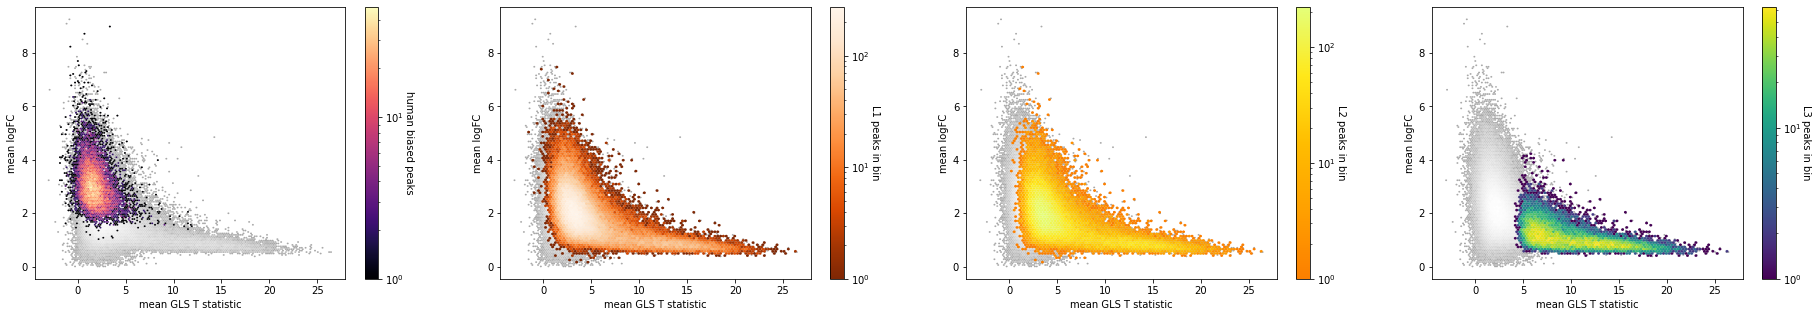

In [49]:
fig, axs = plt.subplots(1, 4, figsize=(4*4*2, 2.5*2))
axs = axs.flatten()

ax = axs[0]
extent = [x.min(), x.max(), y.min(), y.max()]

im = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
               rasterized=True,
              extent=extent)

im = ax.hexbin(x[x.index.isin(de_list)], y[x.index.isin(de_list)], cmap='magma',
               linewidths=0, gridsize=150,
               rasterized=True,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('human biased peaks',
               
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')


ax = axs[1]
im = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               rasterized=True,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

im = ax.hexbin(x.loc[x.index.isin(l1)], y.loc[y.index.isin(l1)],
           # cmap='summer', 
               rasterized=True,
                cmap='Oranges_r',
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L1 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')

ax = axs[2]
im = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               rasterized=True,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

im = ax.hexbin(x.loc[x.index.isin(l2)], y.loc[y.index.isin(l2)],
               rasterized=True,
           # cmap='summer', 
                cmap='Wistia_r',
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L2 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')


ax = axs[3]
im = ax.hexbin(x, y, cmap=cm, linewidths=0, 
               rasterized=True,
               gridsize=150,
               edgecolors='black', mincnt=1, 
               bins='log',
              extent=extent)

im = ax.hexbin(x.loc[l3], y.loc[l3],
               rasterized=True,
                cmap='viridis',
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
plt.savefig('../../figures/atac_cons_div_all_levels.pdf', dpi=400, bbox_inches='tight')

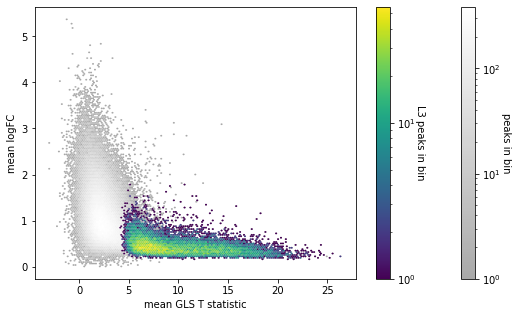

In [112]:
fig, ax = plt.subplots( figsize=(4.5*2, 2.5*2))
m = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

cbar = ax.figure.colorbar(m, ax=ax)
cbar.set_label('peaks in bin',
                       rotation=270,
                       labelpad=10)

im = ax.hexbin(x.loc[l3], y.loc[l3],
               gridsize=150,
           # cmap='summer', 
                cmap='viridis',
               linewidths=0,
            bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent,
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
plt.savefig("../../figures/atac_cons_vs_div_l3_highlight.pdf", transparent=True, dpi=500, bbox_inches='tight')

In [101]:
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
    
        de = de1
    stats, de = common_index(stats, de)
    div.append(de.abs().mean(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

# x = cons.mean(axis=1)
# y = div.mean(axis=1)

print(len(x), len(y))

# r = spearmanr(x, y, nan_policy='omit')[0]
# plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

183394 183394


In [102]:
# x = x.reindex(y.index)

In [103]:
# x[x.isna()] = np.random.rand(x.isna().sum())*1.5 + 1

In [17]:
de_out = '/home/ethan/work/projects/mammalian_motor_cortex_comparative/03_atac_levels/data/processed/da_peak_list/human_4fold/human_up/'
files =!ls {de_out}human* | grep - 'mixed'
de_list = [read_list(file) for file in files]
de_list = np.unique(np.concatenate(de_list))
de_list = de_list[1:]

NameError: name 'read_list' is not defined

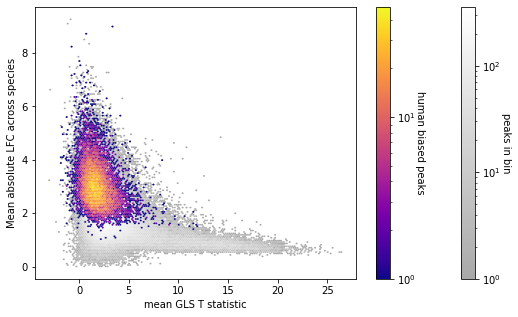

In [50]:
extent = [x.min(), x.max(), y.min(), y.max()]
fig, ax = plt.subplots( figsize=(4.5*2, 2.5*2))
im = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean Minium abosolute LFC in most divergence cell type')
# plt.savefig("../../figures/atac_cons_vs_div_graywhite.pdf", transparent=True, dpi=500, bbox_inches='tight')

# fig, ax = plt.subplots( figsize=(4*2, 2.5*2))
im = ax.hexbin(x[x.index.isin(de_list)], y[x.index.isin(de_list)], cmap='plasma', linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('human biased peaks',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('Mean absolute LFC across species')
plt.savefig("../../figures/atac_human_biased_peaks.pdf", transparent=True, dpi=400)

Text(0, 0.5, 'Mean absolute LFC across species')

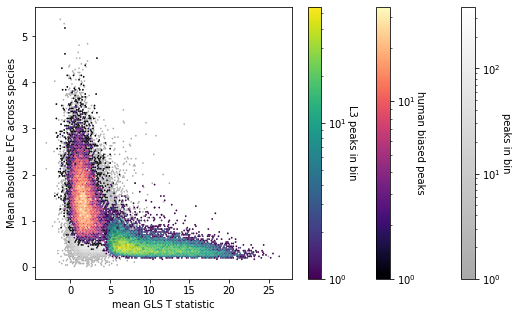

In [114]:
extent = [x.min(), x.max(), y.min(), y.max()]
fig, ax = plt.subplots( figsize=(4.5*2, 2.5*2))
im = ax.hexbin(x, y, cmap=cm, linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean Minium abosolute LFC in most divergence cell type')
# plt.savefig("../../figures/atac_cons_vs_div_graywhite.pdf", transparent=True, dpi=500, bbox_inches='tight')

# fig, ax = plt.subplots( figsize=(4*2, 2.5*2))
im = ax.hexbin(x[x.index.isin(de_list)], y[x.index.isin(de_list)], cmap='magma', linewidths=0, gridsize=150,
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('human biased peaks',
                       rotation=270,
                       labelpad=10)

im = ax.hexbin(x.loc[l3], y.loc[l3],
               gridsize=150,
           # cmap='summer', 
                cmap='viridis',
               linewidths=0,
            bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent,
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('Mean absolute LFC across species')
# plt.savefig("../../figures/atac_human_biased_peaks.pdf", transparent=True, dpi=400)

In [65]:
summary = pd.read_csv('/home/ethan/work/projects/mammalian_motor_cortex_comparative/fig2/data/outputs/atac_levels/atac_summary_table.tsv', sep='\t')

In [66]:
[i for i in summary.columns if 'human' in i]

['human_specific_sequence']

Text(0, 0.5, 'mean logFC')

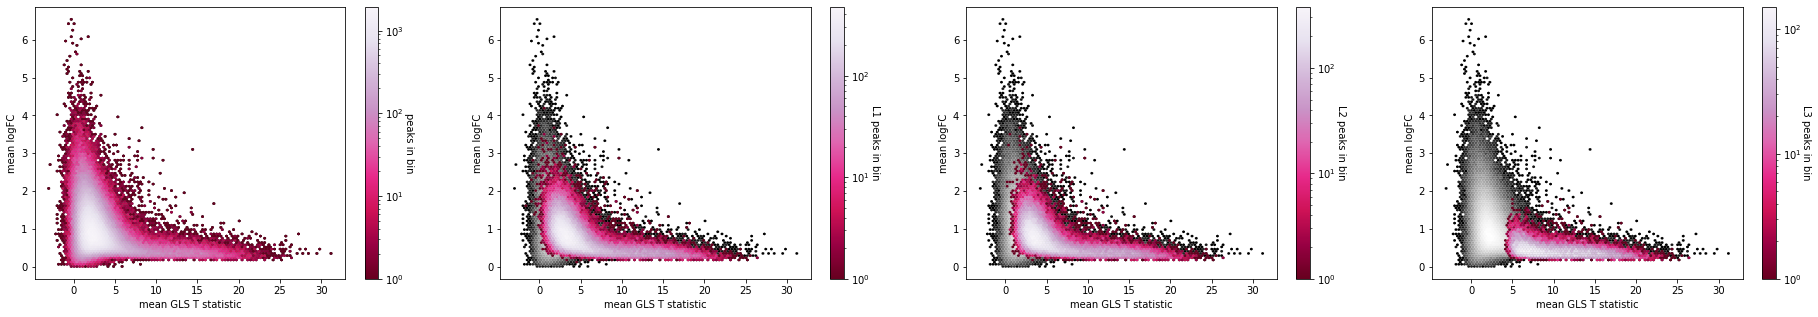

In [67]:
fig, axs = plt.subplots(1, 4, figsize=(4*4*2, 2.5*2))
axs = axs.flatten()

cmap='PuRd_r'
ax = axs[0]
extent = [x.min(), x.max(), y.min(), y.max()]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)


im = ax.hexbin(x, y,
           # cmap='summer', 
                cmap=cmap,
            linewidths=0,
           edgecolors='black', mincnt=1, 
           extent=extent, bins='log'
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')


ax = axs[1]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

im = ax.hexbin(x.loc[x.index.isin(l1)], y.loc[y.index.isin(l1)],
           # cmap='summer', 
                cmap=cmap,
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L1 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')

ax = axs[2]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

im = ax.hexbin(x.loc[x.index.isin(l2)], y.loc[y.index.isin(l2)],
           # cmap='summer', 
                cmap=cmap,
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L2 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')


ax = axs[3]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

im = ax.hexbin(x.loc[l3], y.loc[l3],
           # cmap='summer', 
                cmap=cmap,
               linewidths=0,
 bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent
          )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')

Text(0.5, 1.0, 'four species mean GLS vs mean LogFC')

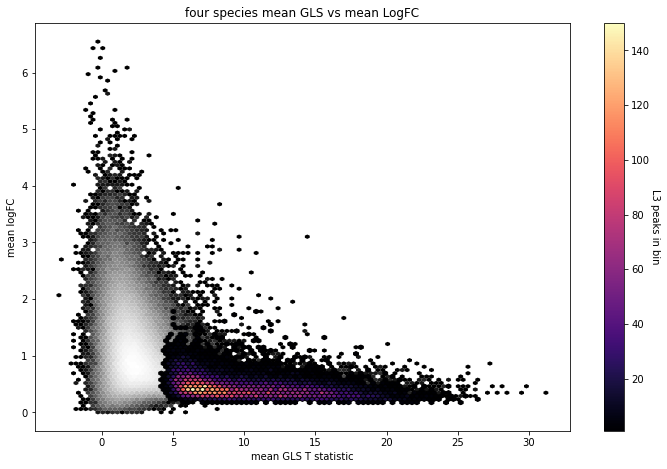

In [68]:
fig, ax = plt.subplots(figsize=(4*3, 2.5*3))
extent = [x.min(), x.max(), y.min(), y.max()]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)


# Create the actual hexbin plot
im = plt.hexbin(x.loc[l3], y.loc[l3],
           # cmap='summer', 
                cmap='magma',
           # linewidths=linewidths,
           edgecolors='black', mincnt=1, 
           extent=extent
          )



cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
# ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')

Text(0.5, 1.0, 'four species mean GLS vs mean LogFC')

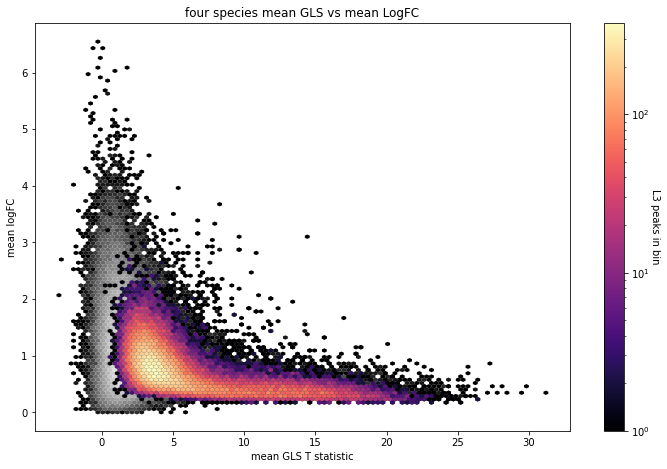

In [69]:
fig, ax = plt.subplots(figsize=(4*3, 2.5*3))
extent = [x.min(), x.max(), y.min(), y.max()]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

pc = im.get_paths()

# Create a mask for hexagons with non-zero count
non_zero_hexes = im.get_array() > 0

# Use this mask to determine the linewidths for the hexagons
linewidths = np.where(non_zero_hexes, 0.1, 0)  # 0.5 is the desired linewidth

# Create the actual hexbin plot
im = plt.hexbin(x.loc[x.index.isin(l2)], y.loc[y.index.isin(l2)],
           # cmap='YlOrBr',
                cmap='magma',
           linewidths=linewidths,
           edgecolors='black', mincnt=1, 
           extent=extent,
                bins='log'
          )



cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
# ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')

Text(0.5, 1.0, 'four species mean GLS vs mean LogFC')

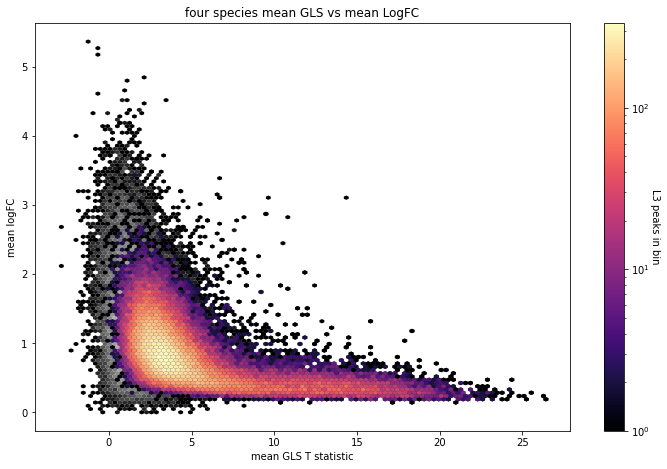

In [56]:
fig, ax = plt.subplots(figsize=(4*3, 2.5*3))
extent = [x.min(), x.max(), y.min(), y.max()]
im = ax.hexbin(x, y, cmap='gray', linewidths=0, 
               edgecolors='black', mincnt=1, bins='log',
              extent=extent)

pc = im.get_paths()

# Create a mask for hexagons with non-zero count
non_zero_hexes = im.get_array() > 0

# Use this mask to determine the linewidths for the hexagons
linewidths = np.where(non_zero_hexes, 0.1, 0)  # 0.5 is the desired linewidth

# Create the actual hexbin plot
im = plt.hexbin(x.loc[x.index.isin(l1)], y.loc[y.index.isin(l1)],
           cmap='magma', 
           linewidths=linewidths,
           edgecolors='black', mincnt=1, 
           extent=extent,
                bins='log'
          )



cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('L3 peaks in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
# ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/outputs/atac_gls_results/experimental/primate_conserved/gls_human_macaque.tsv'

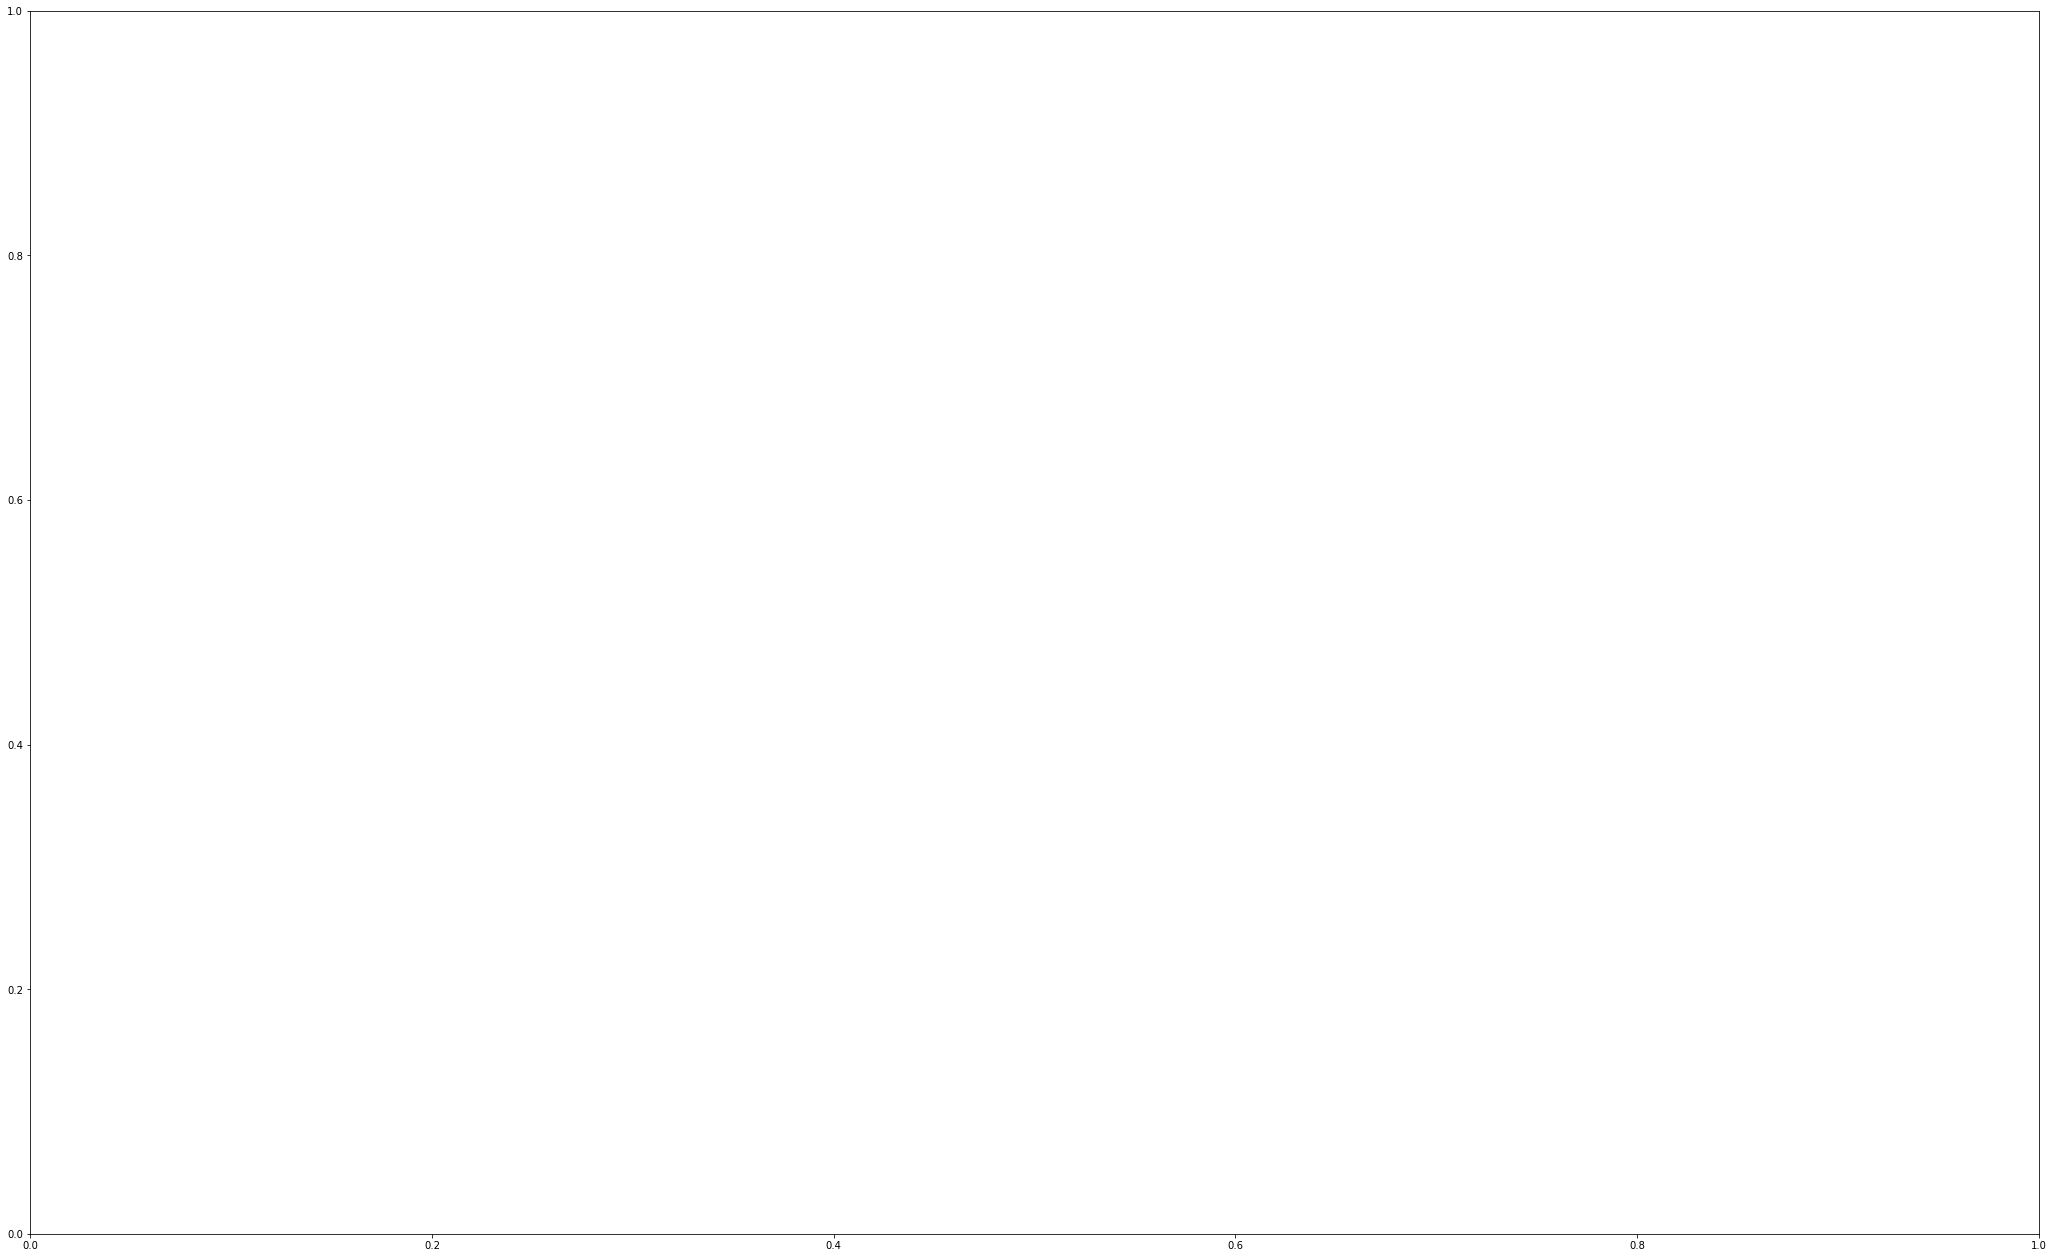

In [57]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = pd.concat([de1, de])
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=0)
cons = pd.concat(cons, axis=0)

x = cons
y = div

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')
# plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

In [ ]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    
    if 'mouse' in pair: 
        stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    else:
        stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/primate_conserved/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
        de = pd.read_csv(out_f2.format(spec1, spec2),
                     sep='\t').set_index('Unnamed: 0')
        de1 = pd.read_csv(out_f.format('human', spec1, spec2),
                          sep='\t').set_index('Unnamed: 0')
        de = pd.concat([de1, de])
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=0)
cons = pd.concat(cons, axis=0)

x = cons.max(axis=1)
y = div.max(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.title('four species mean GLS vs mean LogFC')
# plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

In [ ]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    if 'mouse' in pair:
        continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    stats, de = common_index(stats, de)
    div.append(de.abs().mean(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

In [ ]:
phastcons = pd.read_csv('../../data/ref/human_origin_average_peak_phastcons.tsv', sep='\t')

In [ ]:
# phastcons['name'] = phastcons['chrm'] + '-' + phastcons['start'].astype(str) + '-' + phastcons['end'].astype(str)

In [ ]:
phastcons= phastcons.set_index('name')

In [ ]:
phastcons

In [ ]:
phastcons.index.unique().shape

In [ ]:
y = phastcons.loc[phastcons.phastcons.notna().values]['phastcons']

In [ ]:
y.index.shape

In [66]:
stats

r_square     coeff         p_val      t_val  \
human                                                                   
chr1-100037837-100038336  0.904993  0.948099  1.104501e-11  13.802592   
chr1-100038391-100038890  0.852804  0.990484  9.040343e-10  10.764444   
chr1-100067898-100068397  0.091769 -0.313086  1.705610e-01  -1.421559   
chr1-100075099-100075598  0.008583 -0.197783  6.817608e-01  -0.416110   
chr1-100077572-100078071  0.036708 -0.252933  3.930188e-01  -0.873010   
...                            ...       ...           ...        ...   
chrX-9948485-9948984      0.010327 -0.337248  6.527102e-01  -0.456838   
chrX-99588917-99589416    0.028999  0.854199  4.486507e-01   0.772847   
chrX-99748308-99748807    0.324860  0.471926  5.617092e-03   3.102176   
chrY-19744326-19744825    0.403884  0.801210  1.480964e-03   3.681103   
chrY-7736918-7737417      0.151938  0.370614  7.292994e-02   1.892929   

                                   fdr      corr  fdr_corr  pear_corr  \
human                                                                   
chr1-100037837-100038336  6.776381e-09  0.631169  0.081348   0.703560   
chr1-100038391-100038890  3.340859e-07  0.528571  0.371317   0.608060   
chr1-100067898-100068397  1.000000e+00 -0.622280  0.094955  -0.675774   
chr1-100075099-100075598  1.000000e+00  0.158442  1.000000   0.032850   
chr1-100077572-100078071  1.000000e+00 -0.589610  0.159535  -0.568647   
...                                ...       ...       ...        ...   
chrX-9948485-9948984      1.000000e+00 -0.036364  1.000000  -0.314354   
chrX-99588917-99589416    1.000000e+00  0.384211  1.000000   0.326925   
chrX-99748308-99748807    1.717981e-01  0.783931  0.002278   0.714889   
chrY-19744326-19744825    5.814392e-02  0.144156  1.000000   0.279061   
chrY-7736918-7737417      1.000000e+00  0.704774  0.018911   0.730635   

                          fdr_pear  
human                               
chr1-100037837-100038336  0.013488  
chr1-100038391-100038890  0.091965  
chr1-100067898-100068397  0.025217  
chr1-100075099-100075598  1.000000  
chr1-100077572-100078071  0.173159  
...                            ...  
chrX-9948485-9948984      1.000000  
chrX-99588917-99589416    1.000000  
chrX-99748308-99748807    0.010258  
chrY-19744326-19744825    1.000000  
chrY-7736918-7737417      0.006862  

[199979 rows x 9 columns]

In [67]:
y.index.isin(stats.index).sum()

799842

In [70]:
phastcons.index

Index(['chr1-100037837-100038336', 'chr1-100038391-100038890',
       'chr1-100067898-100068397', 'chr1-100075099-100075598',
       'chr1-100077572-100078071', 'chr1-100081771-100082270',
       'chr1-100123432-100123931', 'chr1-100132769-100133268',
       'chr1-100152212-100152711', 'chr1-100177778-100178277',
       ...
       'chrX-99191548-99192047', 'chrX-99192464-99192963',
       'chrX-99294999-99295498', 'chrX-99445270-99445769',
       'chrX-9948485-9948984', 'chrX-99588917-99589416',
       'chrX-99748308-99748807', 'chrX-99914549-99915048',
       'chrY-19744326-19744825', 'chrY-7736918-7737417'],
      dtype='object', name='name', length=204920)

In [72]:
stats.index.isin(phastcons.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [68]:
cons.index

Index(['chr1-100037837-100038336', 'chr1-100038391-100038890',
       'chr1-100067898-100068397', 'chr1-100075099-100075598',
       'chr1-100077572-100078071', 'chr1-100081771-100082270',
       'chr1-100123432-100123931', 'chr1-100132769-100133268',
       'chr1-100152212-100152711', 'chr1-100177778-100178277',
       ...
       'chrX-151965646-151966145', 'chrX-154699303-154699802',
       'chrX-24135304-24135803', 'chrX-39609899-39610398',
       'chrX-40965395-40965894', 'chrX-43168459-43168958',
       'chrX-44064029-44064528', 'chrX-46853402-46853901',
       'chrX-97860227-97860726', 'chr2-111453674-111454173'],
      dtype='object', name='human', length=204357)

In [74]:
x.index

Index(['chr1-100037837-100038336', 'chr1-100038391-100038890',
       'chr1-100067898-100068397', 'chr1-100075099-100075598',
       'chr1-100077572-100078071', 'chr1-100081771-100082270',
       'chr1-100123432-100123931', 'chr1-100132769-100133268',
       'chr1-100152212-100152711', 'chr1-100177778-100178277',
       ...
       'chrX-151965646-151966145', 'chrX-154699303-154699802',
       'chrX-24135304-24135803', 'chrX-39609899-39610398',
       'chrX-40965395-40965894', 'chrX-43168459-43168958',
       'chrX-44064029-44064528', 'chrX-46853402-46853901',
       'chrX-97860227-97860726', 'chr2-111453674-111454173'],
      dtype='object', name='human', length=204357)

In [75]:
y.index

Index(['chr1-100037837-100038336', 'chr1-100037837-100038336',
       'chr1-100037837-100038336', 'chr1-100037837-100038336',
       'chr1-100038391-100038890', 'chr1-100038391-100038890',
       'chr1-100038391-100038890', 'chr1-100038391-100038890',
       'chr1-100067898-100068397', 'chr1-100067898-100068397',
       ...
       'chrX-99914549-99915048', 'chrX-99914549-99915048',
       'chrY-19744326-19744825', 'chrY-19744326-19744825',
       'chrY-19744326-19744825', 'chrY-19744326-19744825',
       'chrY-7736918-7737417', 'chrY-7736918-7737417', 'chrY-7736918-7737417',
       'chrY-7736918-7737417'],
      dtype='object', name='name', length=819598)

In [76]:
a, b = common_index(x, y)

In [80]:
a.shape

(204357,)

In [81]:
y.shape

(819598,)

In [78]:
b

human
chr1-100037837-100038336    0.534068
chr1-100037837-100038336    0.534068
chr1-100037837-100038336    0.534068
chr1-100037837-100038336    0.534068
chr1-100038391-100038890    0.060922
                              ...   
chrX-97860227-97860726      0.422445
chr2-111453674-111454173    0.010822
chr2-111453674-111454173    0.010822
chr2-111453674-111454173    0.010822
chr2-111453674-111454173    0.010822
Name: phastcons, Length: 817348, dtype: float64

Text(0, 0.5, 'mean logFC')

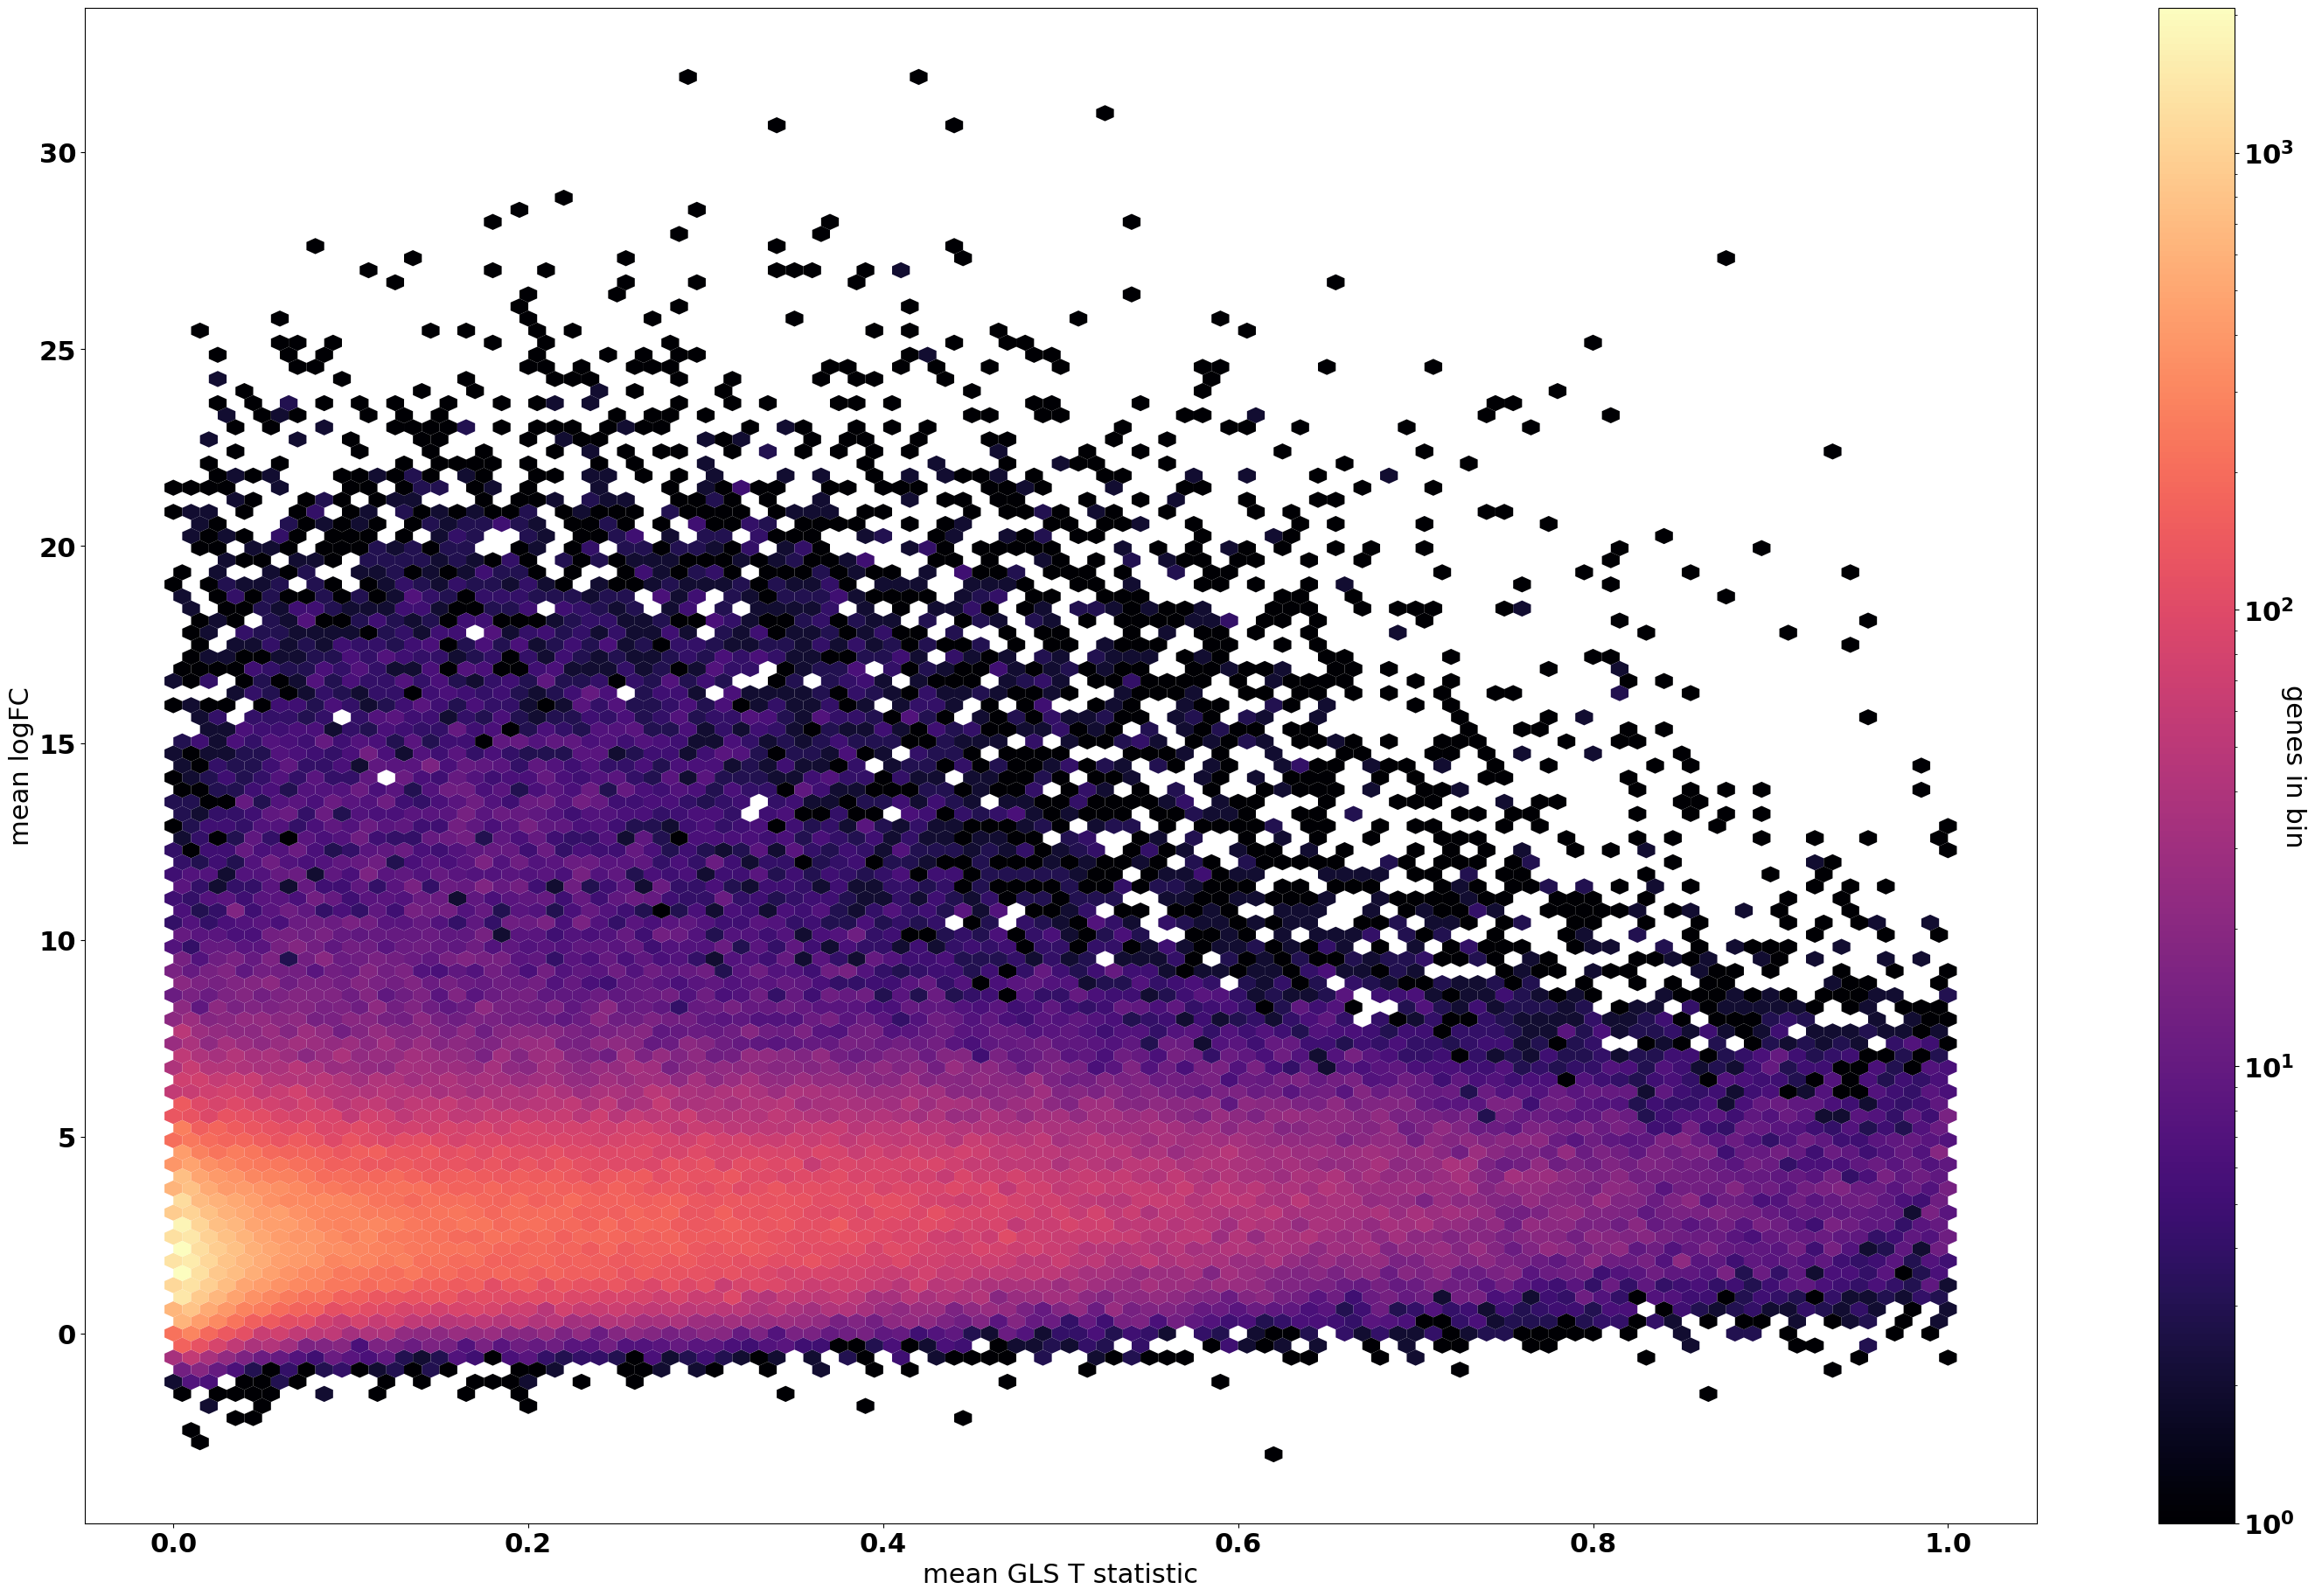

In [95]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    if 'mouse' in pair:
        continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    stats, de = common_index(stats, de)
    div.append(de.abs().mean(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)


x = cons.mean(axis=1)
y = phastcons.loc[phastcons.phastcons.notna().values]['phastcons']

# use = y.notna()

y, x = common_index(x, y)

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
# ax.text(15, 0, 'Spearman r = {:4f}'.format(r))
# plt.savefig("../../figures/atac_phastcons_human_origin.pdf", transparent=True, dpi=500)

Text(0, 0.5, 'mean logFC')

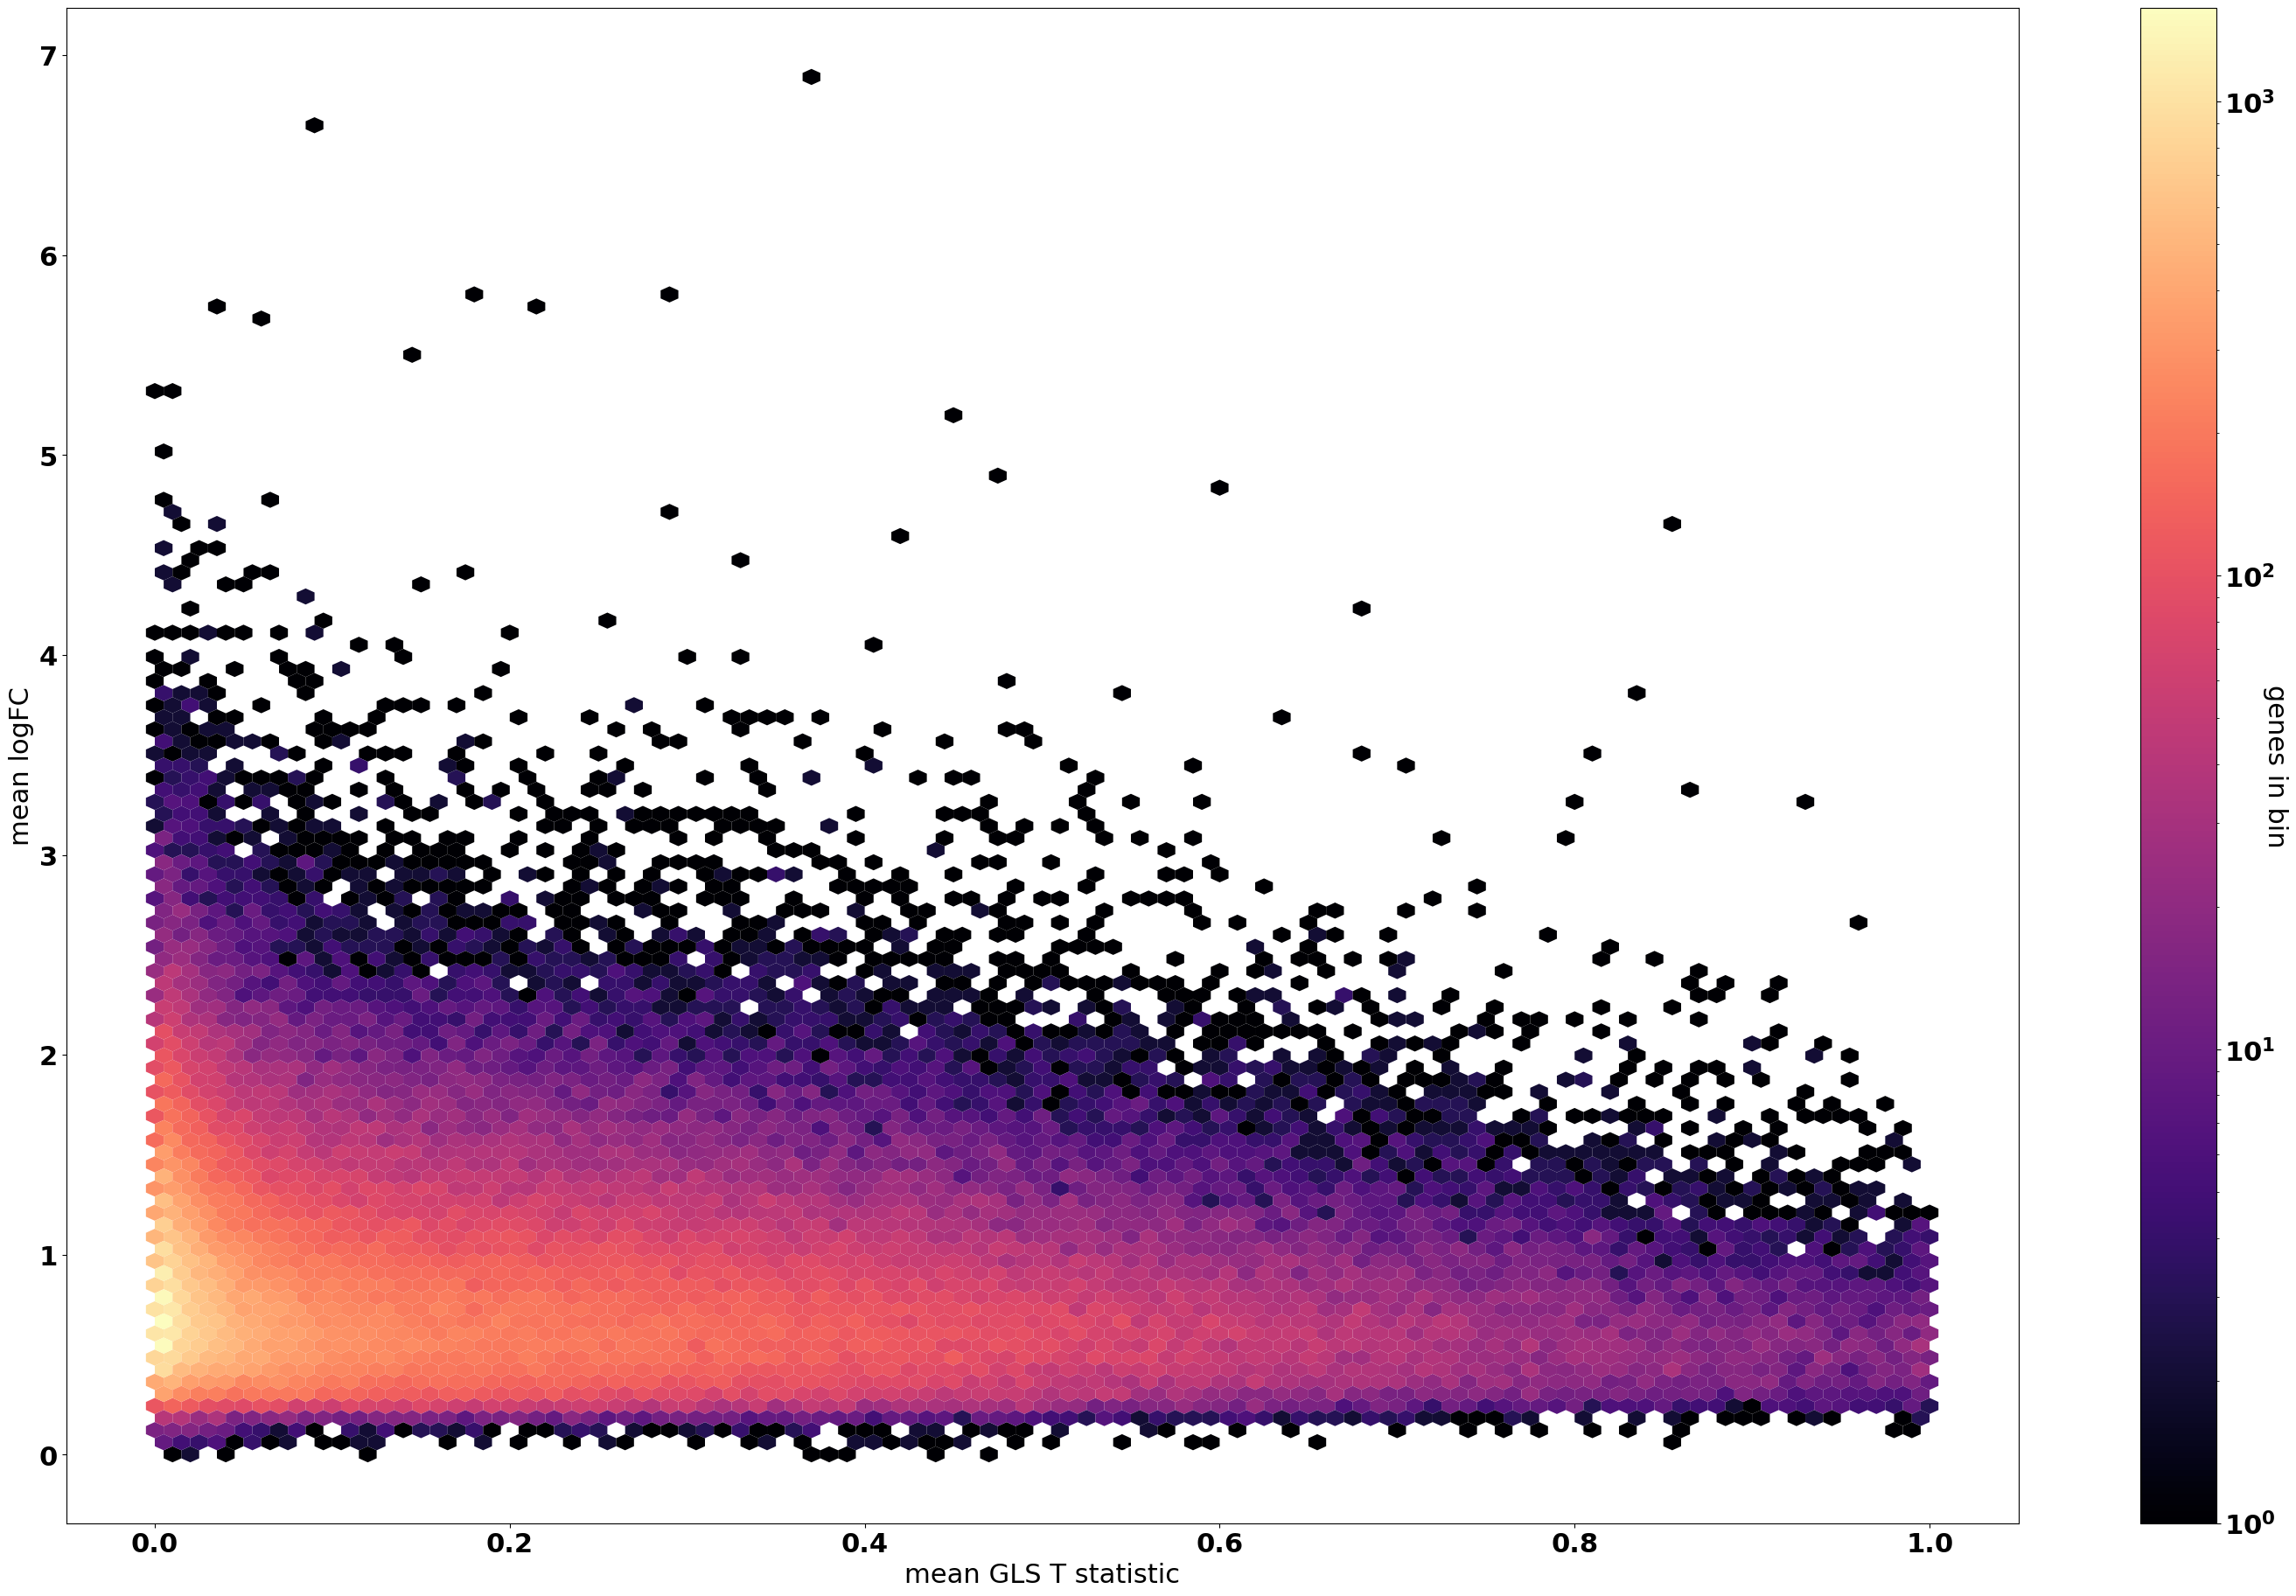

In [98]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    if 'mouse' in pair:
        continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/human_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    stats, de = common_index(stats, de)
    div.append(de.abs().mean(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)


y = div.mean(axis=1)
x = phastcons.loc[phastcons.phastcons.notna().values]['phastcons']

# use = y.notna()

x, y = common_index(x, y)

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
# ax.text(15, 0, 'Spearman r = {:4f}'.format(r))
# plt.savefig("../../figures/atac_phastcons_human_origin.pdf", transparent=True, dpi=500)

In [99]:
r

-0.13038989086686892

In [28]:
interest = x[(x>5) & (y>5)].index

In [29]:
check = '../../data/processed/atac_for_gls/human_origin_peaks/relative/{}_log2_plus1_relative_accessibility.tsv'

In [30]:
check_h_relative = pd.read_csv(check.format('human'), sep='\t')

In [96]:
# check_h_relative.loc[check_h_relative.human.isin(interest)]

In [32]:
spec1, spec2

('marmoset', 'mouse')

In [33]:
de.loc[interest]

ASC       ChC      Endo    L2_3_IT  \
human                                                                 
chr1-3624641-3625140      -10.278971 -7.116352 -8.220677 -10.508053   
chr10-102399287-102399786  -9.849588       NaN -7.445689 -11.988134   
chr10-102420608-102421107  -9.969448 -6.827619 -7.523226  -8.042997   
chr10-102421108-102421607 -10.038231       NaN -7.714054 -12.099900   
chr14-102592276-102592775 -10.878547 -7.680926 -8.665321 -12.836277   
chr14-103715355-103715854  -7.693184 -7.732814 -7.221019  -8.375376   
chr16-28403887-28404386    -0.048388       NaN -0.600544  -0.002673   
chr17-46590428-46590927     0.136159  0.033359  0.015809   0.111225   
chr19-17859513-17860012   -10.315862 -7.166871 -8.066211 -12.402184   
chr19-40777982-40778481   -10.945620 -7.591891 -8.864427 -12.841224   
chr19-40798704-40799203   -11.091759 -7.762462 -8.550403 -12.796598   
chr2-73737164-73737663      9.825667       NaN  7.264225  12.415331   
chr20-462288-462787       -10.212105 -6.876462 -7.994224 -12.188544   
chr21-34375162-34375661     0.065652 -0.393345 -0.360149   0.105522   
chr21-43427078-43427577    -0.048236 -0.028585 -0.454116   0.133502   
chr3-32684922-32685421     -9.864791 -7.173464 -7.424679 -10.503880   
chr7-140479243-140479742   -9.685071 -6.881158 -7.645136  -9.295227   
chr9-128455793-128456292   -7.103682 -6.826754 -7.833443  -7.254669   

                             L4_5_IT   L5_6_NP      L5_ET      L5_IT  \
human                                                                  
chr1-3624641-3625140      -11.168922 -8.886364  -9.725380  -9.075528   
chr10-102399287-102399786 -10.932539 -8.532161  -9.478948 -10.635829   
chr10-102420608-102421107  -7.360816 -8.688363  -9.374771 -10.660699   
chr10-102421108-102421607 -11.012687 -8.797434  -9.549085  -8.945619   
chr14-102592276-102592775 -11.765547 -9.445715 -10.236271 -11.421550   
chr14-103715355-103715854  -7.375790 -9.618819 -10.293663  -7.790817   
chr16-28403887-28404386    -0.091903 -0.297616  -0.093026   0.020597   
chr17-46590428-46590927    -0.009682  0.171331  -0.213831   0.112802   
chr19-17859513-17860012   -11.159549 -9.153341  -9.893012 -10.952532   
chr19-40777982-40778481   -11.689303 -9.541121 -10.361647 -11.430830   
chr19-40798704-40799203   -11.592805 -9.465428 -10.324099  -9.642263   
chr2-73737164-73737663     10.997423  8.777566   9.516057   9.681861   
chr20-462288-462787       -10.991038 -8.773648  -9.751826 -10.691846   
chr21-34375162-34375661    -0.014213 -0.175460  -0.135580   0.013474   
chr21-43427078-43427577    -0.020489 -0.200761  -0.075072  -0.171271   
chr3-32684922-32685421    -11.198109 -8.835138  -9.864132 -10.945612   
chr7-140479243-140479742   -8.624443 -8.426188  -9.193412 -10.397404   
chr9-128455793-128456292   -8.083863 -8.946455  -5.618058  -7.746171   

                                L6b      L6_CT  ...      L6_IT      LAMP5  \
human                                           ...                         
chr1-3624641-3625140      -8.784439  -8.420051  ... -10.486076  -8.082747   
chr10-102399287-102399786 -8.424088 -10.690057  ... -10.178670  -9.111564   
chr10-102420608-102421107 -8.427645  -6.811514  ...  -7.609331  -9.123798   
chr10-102421108-102421607 -8.543551 -10.757602  ... -10.331398  -9.483823   
chr14-102592276-102592775 -9.285747 -11.491045  ... -11.075066 -10.011512   
chr14-103715355-103715854 -6.630138  -9.216439  ... -11.052269 -10.030963   
chr16-28403887-28404386    0.006177  -0.192903  ...  -0.199828  -0.155670   
chr17-46590428-46590927   -0.190307  -0.037384  ...   0.003571   0.052264   
chr19-17859513-17860012   -8.854663 -11.256459  ... -10.508641  -9.379499   
chr19-40777982-40778481   -9.341444 -11.574478  ... -11.094030 -10.026875   
chr19-40798704-40799203   -9.326914  -9.065338  ...  -9.241127 -10.115929   
chr2-73737164-73737663     8.553968  10.872439  ...  10.375822   9.240028   
chr20-462288-462787       -8.557813 -10.849356  ... -10.397674  -9.172120   
chr21-34375162-3

In [34]:
out_f = '../../data/outputs/atac_de_results/macaque_origin/lrt/aggregate/{1}_v_{2}_logfc.tsv'

186256 186256
186256 186256
186256 186256
186256 186256
186256 186256
186256 186256


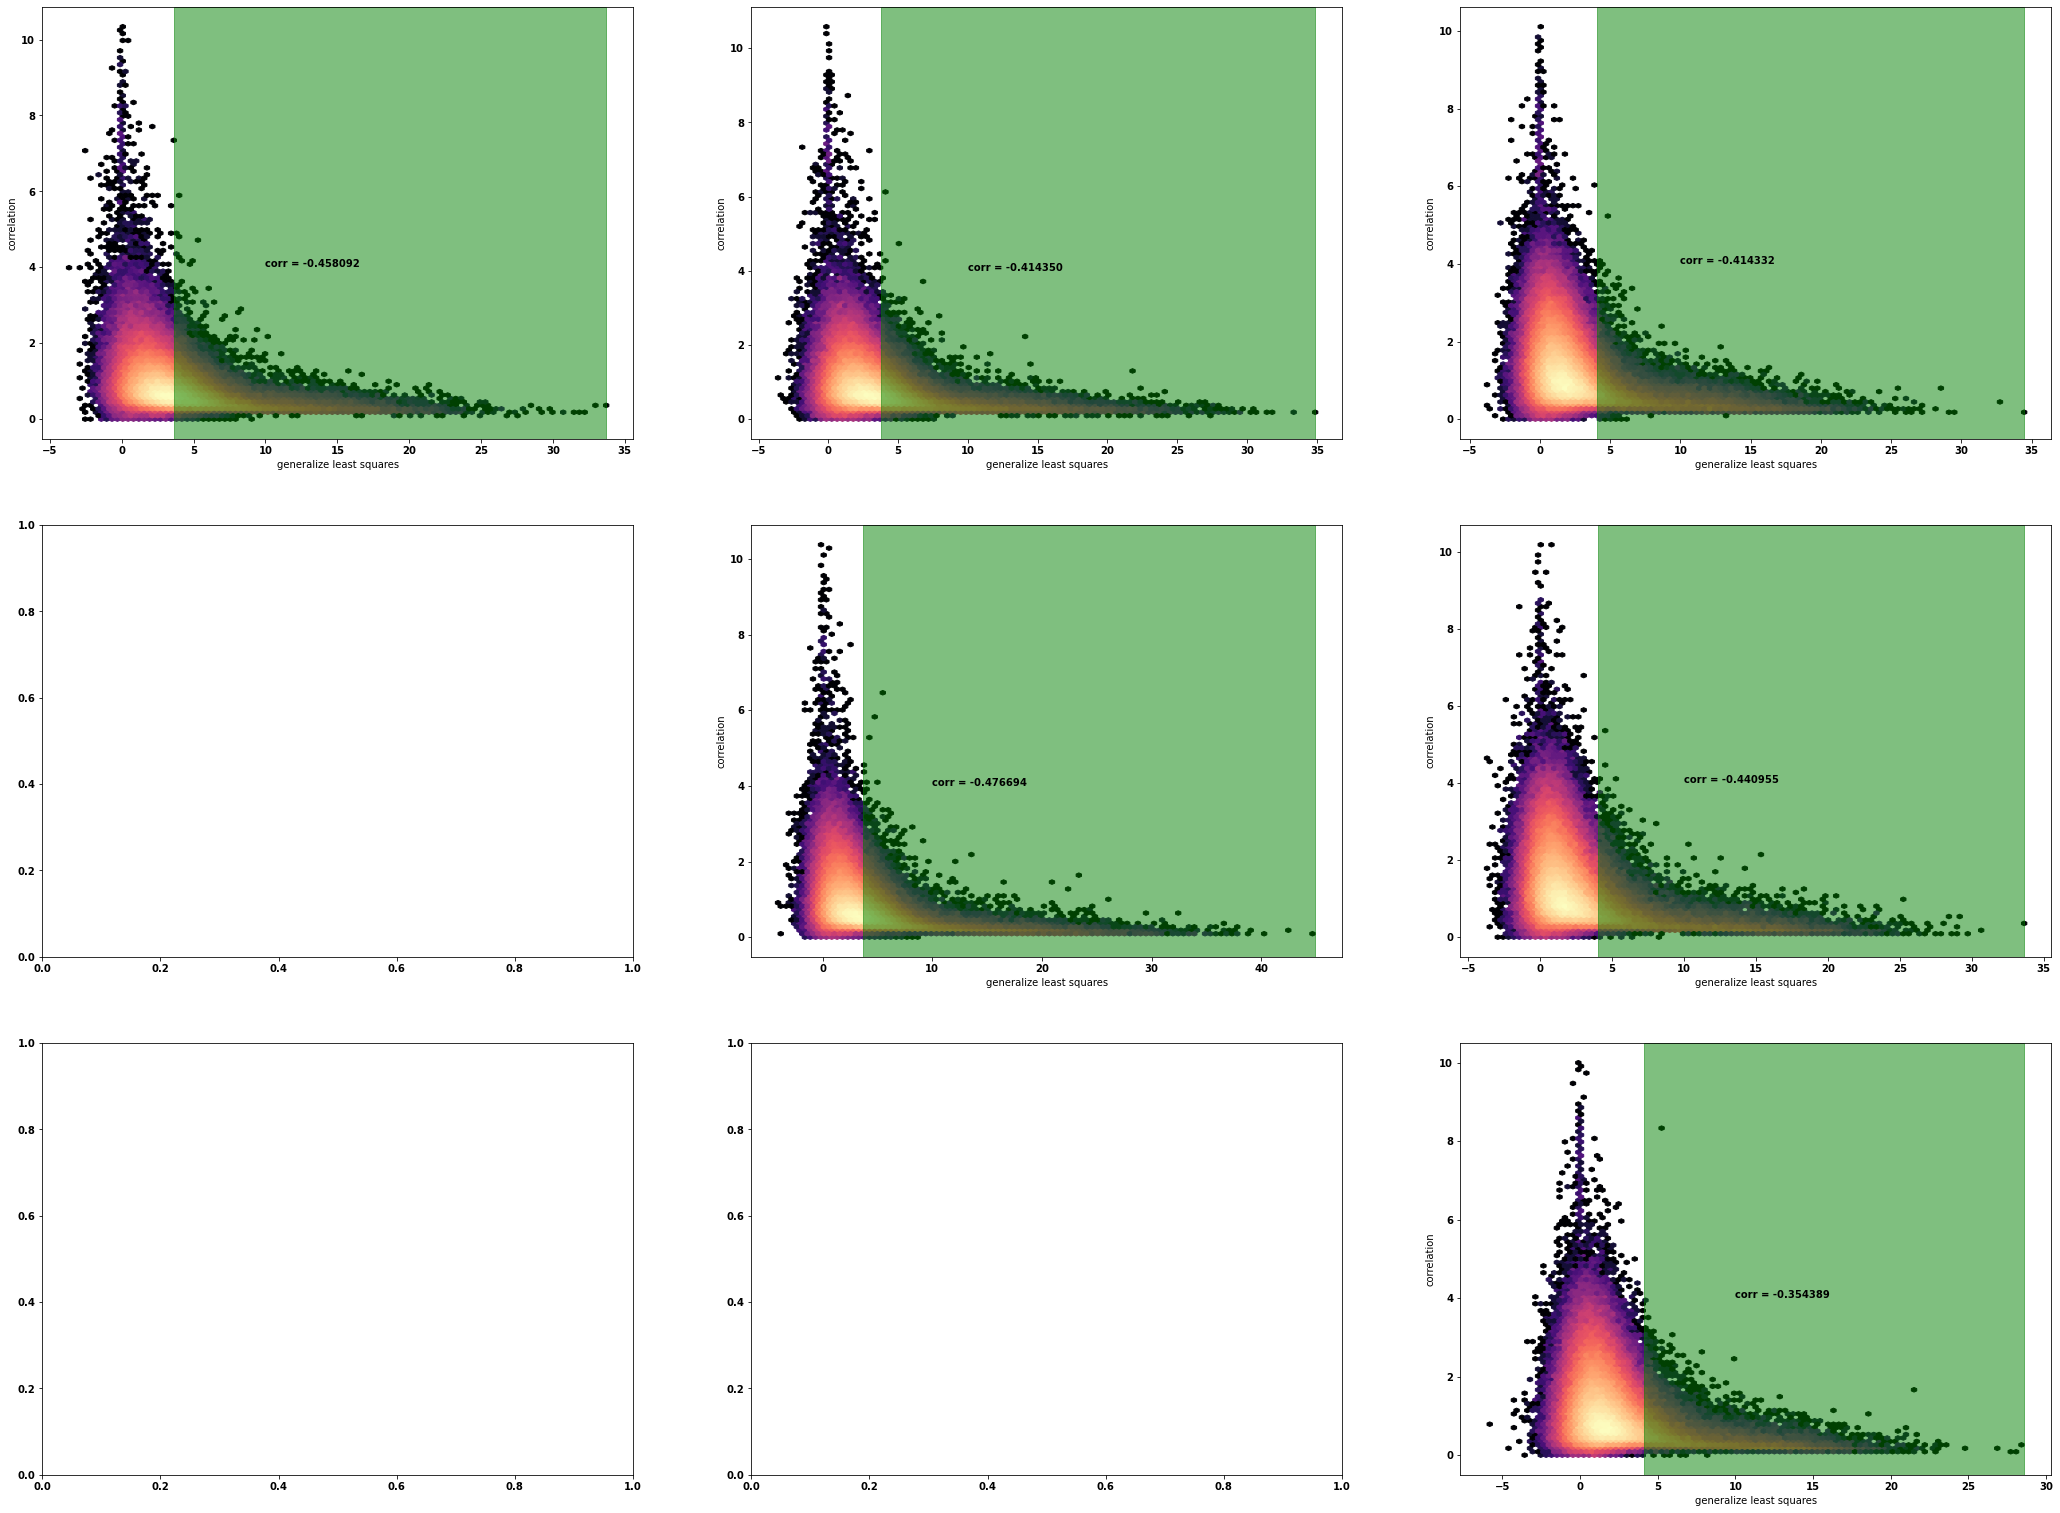

In [35]:
fig, axs = plt.subplots(3, 3, figsize=(4*9, 3*9))
# param_use = 
pairs = []
for specie in species[:-1]:
    for specie_2 in species[1:]:
        pairs.append((specie, specie_2))

cov_p = []
cov_a = []
cons_p = []
cons_a = []
test_use = 'lrt'
max_t_stat = 1e6
axs = axs.flatten()
idx = 0
for ax, pair in zip(axs, pairs):
    if pair not in pairs_use:
        continue
    spec1, spec2 = pair
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/macaque_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    cov_a.append(stats.index)
    cons_a.append(stats.index[stats.fdr < .05])
    if "mouse" not in pair:
        cons_p.append(stats.index[stats.fdr < .05])
        cov_p.append(stats.index)
    
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    
    stats, de = common_index(stats, de)
    x = stats.t_val
    y = de.abs().mean(axis=1)
    min_t = stats.t_val.loc[stats.fdr < .05].abs().min()
    max_t = np.min([stats.t_val.loc[stats.fdr < .05].max(), max_t_stat])
    use = x < max_t_stat
    r = spearmanr(x[use], y[use], nan_policy='omit')[0]
    im = ax.hexbin(x[use], y[use], cmap='magma', bins='log')
    ax.set_xlabel('generalize least squares')
    ax.set_ylabel('correlation')
    # sig_gls = stats['fdr'] < .05/2000
    # sig_corr = stats['fdr_corr'] < .05/20
    # gene_gls.append(stats.loc[sig_gls].human_gene.values)
    # gene_corr.append(stats.loc[sig_corr].human_gene.values)
    ax.text(10, 4, 'corr = {:4f}'.format(r))
    ax.axvspan(min_t, max_t, color='green', alpha=0.5)
    # ax.hist(x)
    print(len(x), len(y))
    
    
    
    # print(np.sum(sig_gls), np.sum(sig_corr))
    # ax.scatter(x[sig_gls], y[sig_gls], c='blue')
    # ax.scatter(x[sig_corr], y[sig_corr], c='green')    

186256 186256


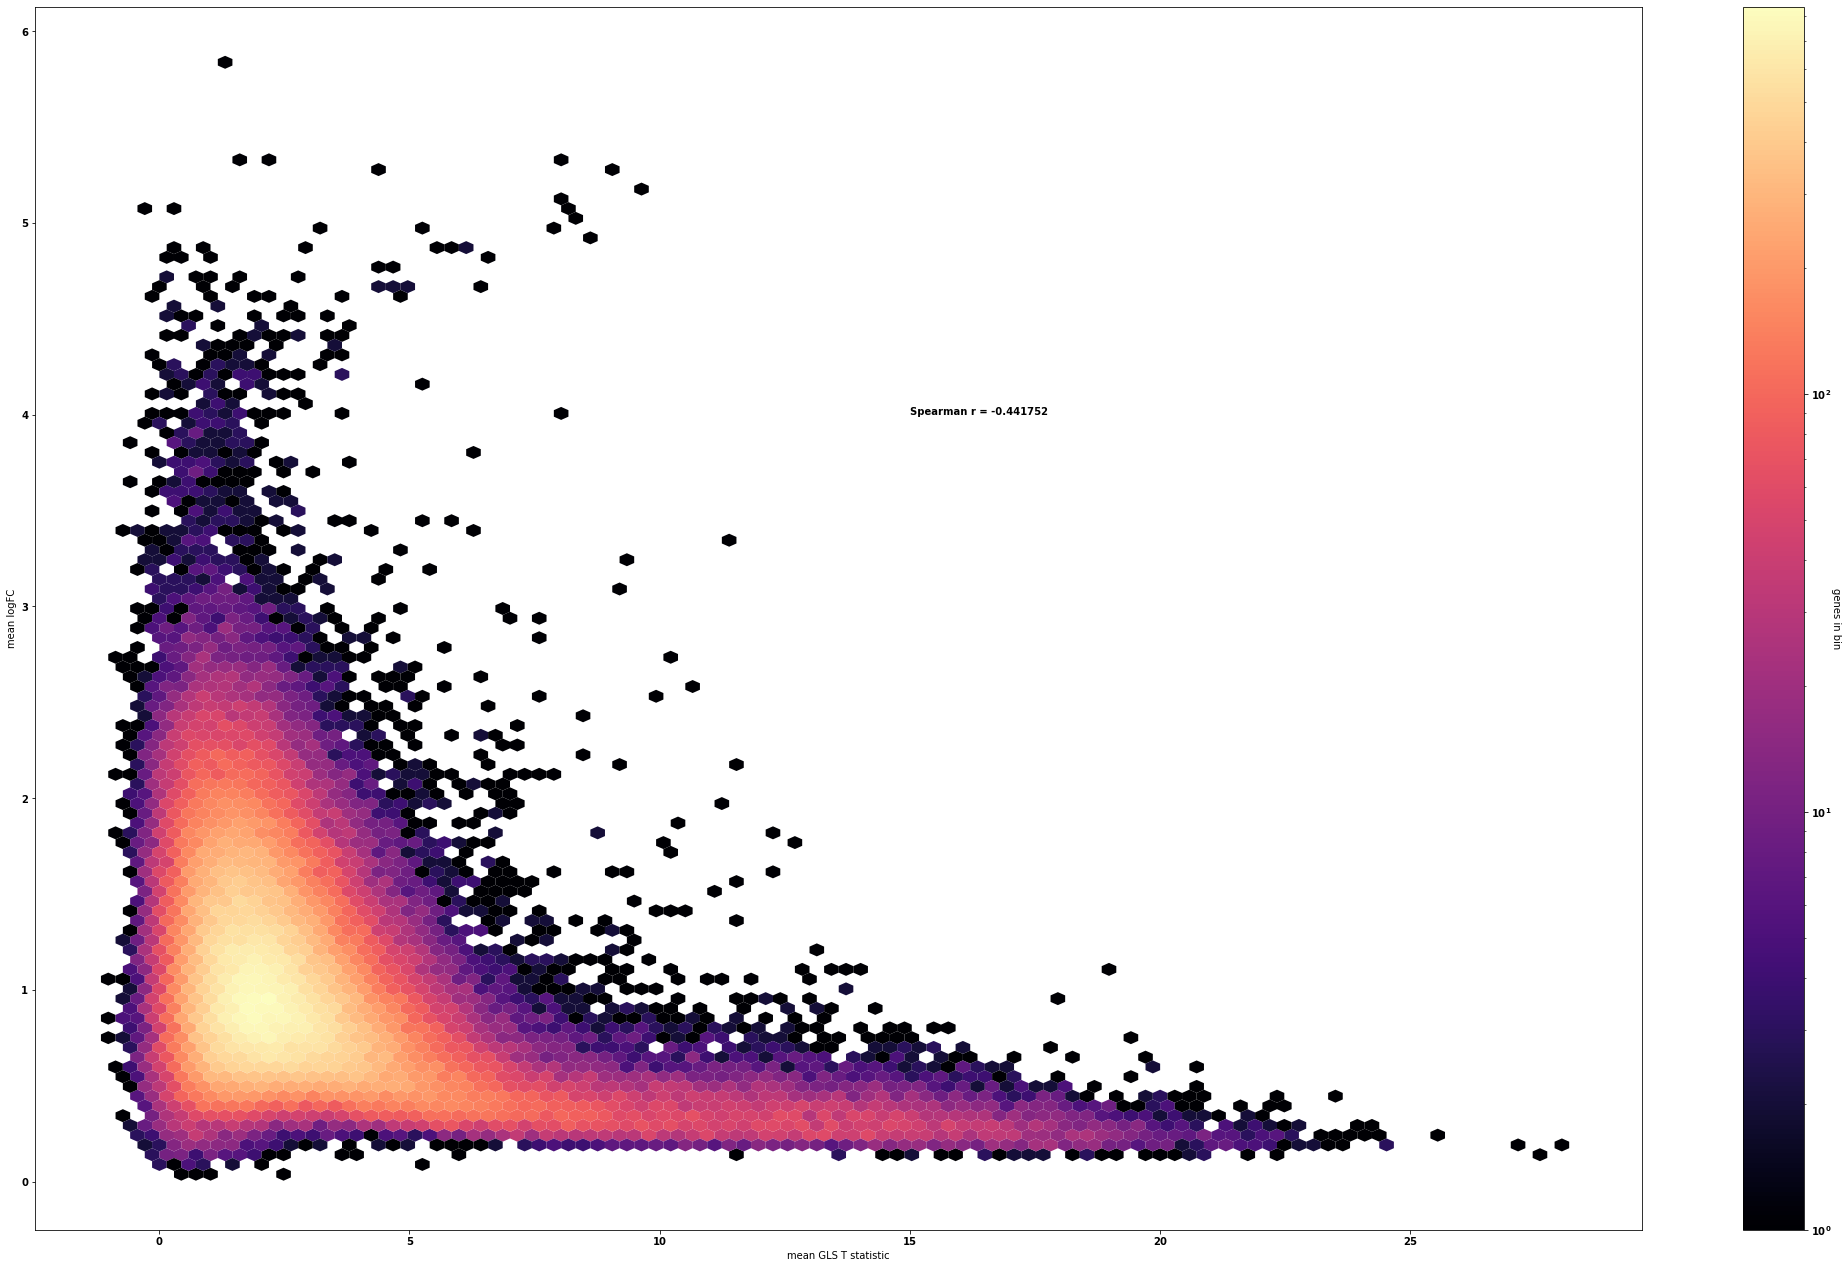

In [36]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/macaque_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    stats, de = common_index(stats, de)
    div.append(de.abs().mean(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 4, 'Spearman r = {:4f}'.format(r))
plt.savefig("../../figures/atac_cons_vs_div_macaque_origin.pdf", transparent=True, dpi=500)

186256 186256


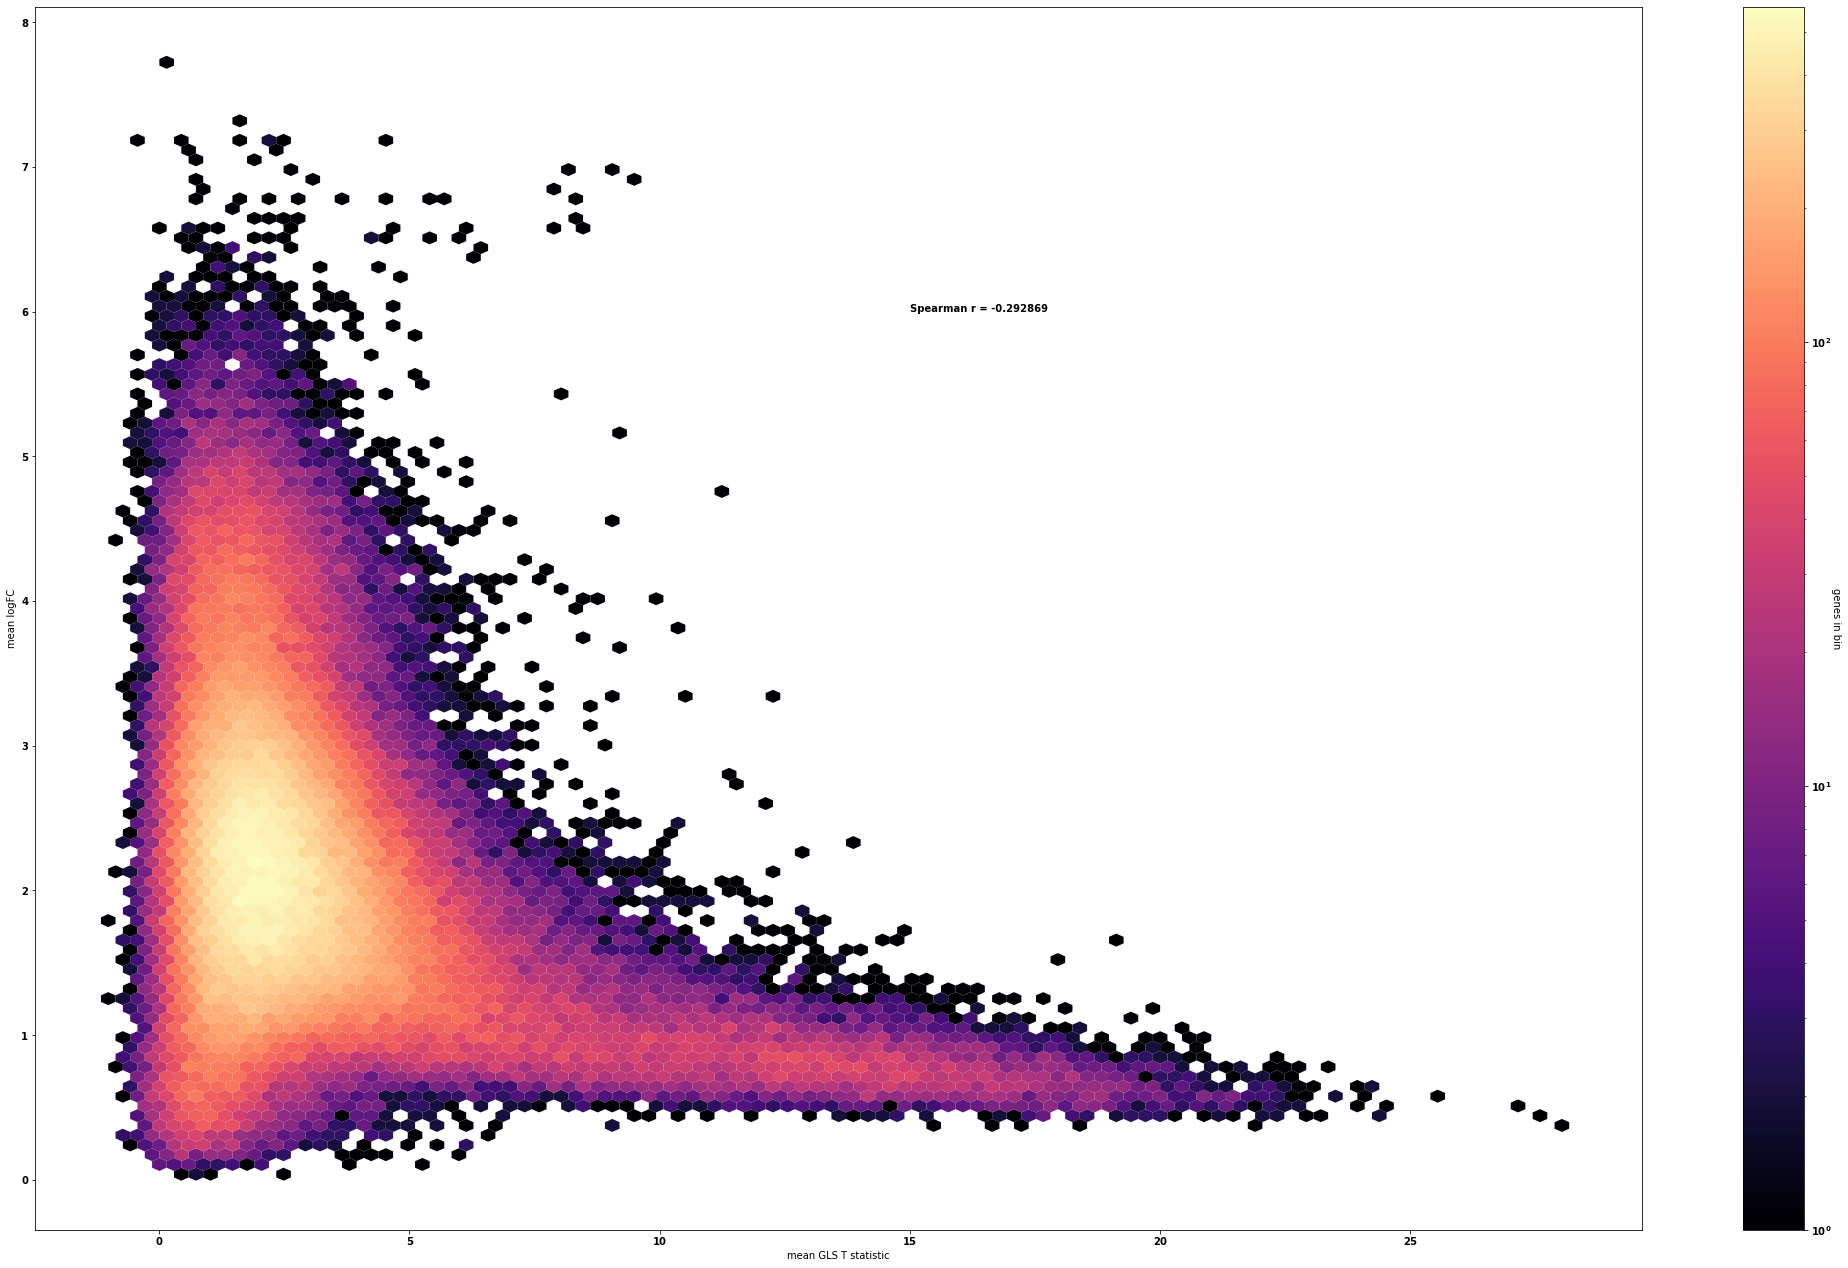

In [39]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/experimental/macaque_origin/log2cpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('human')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
plt.savefig("../../figures/atac_cons_vs_div_human_origin.pdf", transparent=True, dpi=500)

474 474


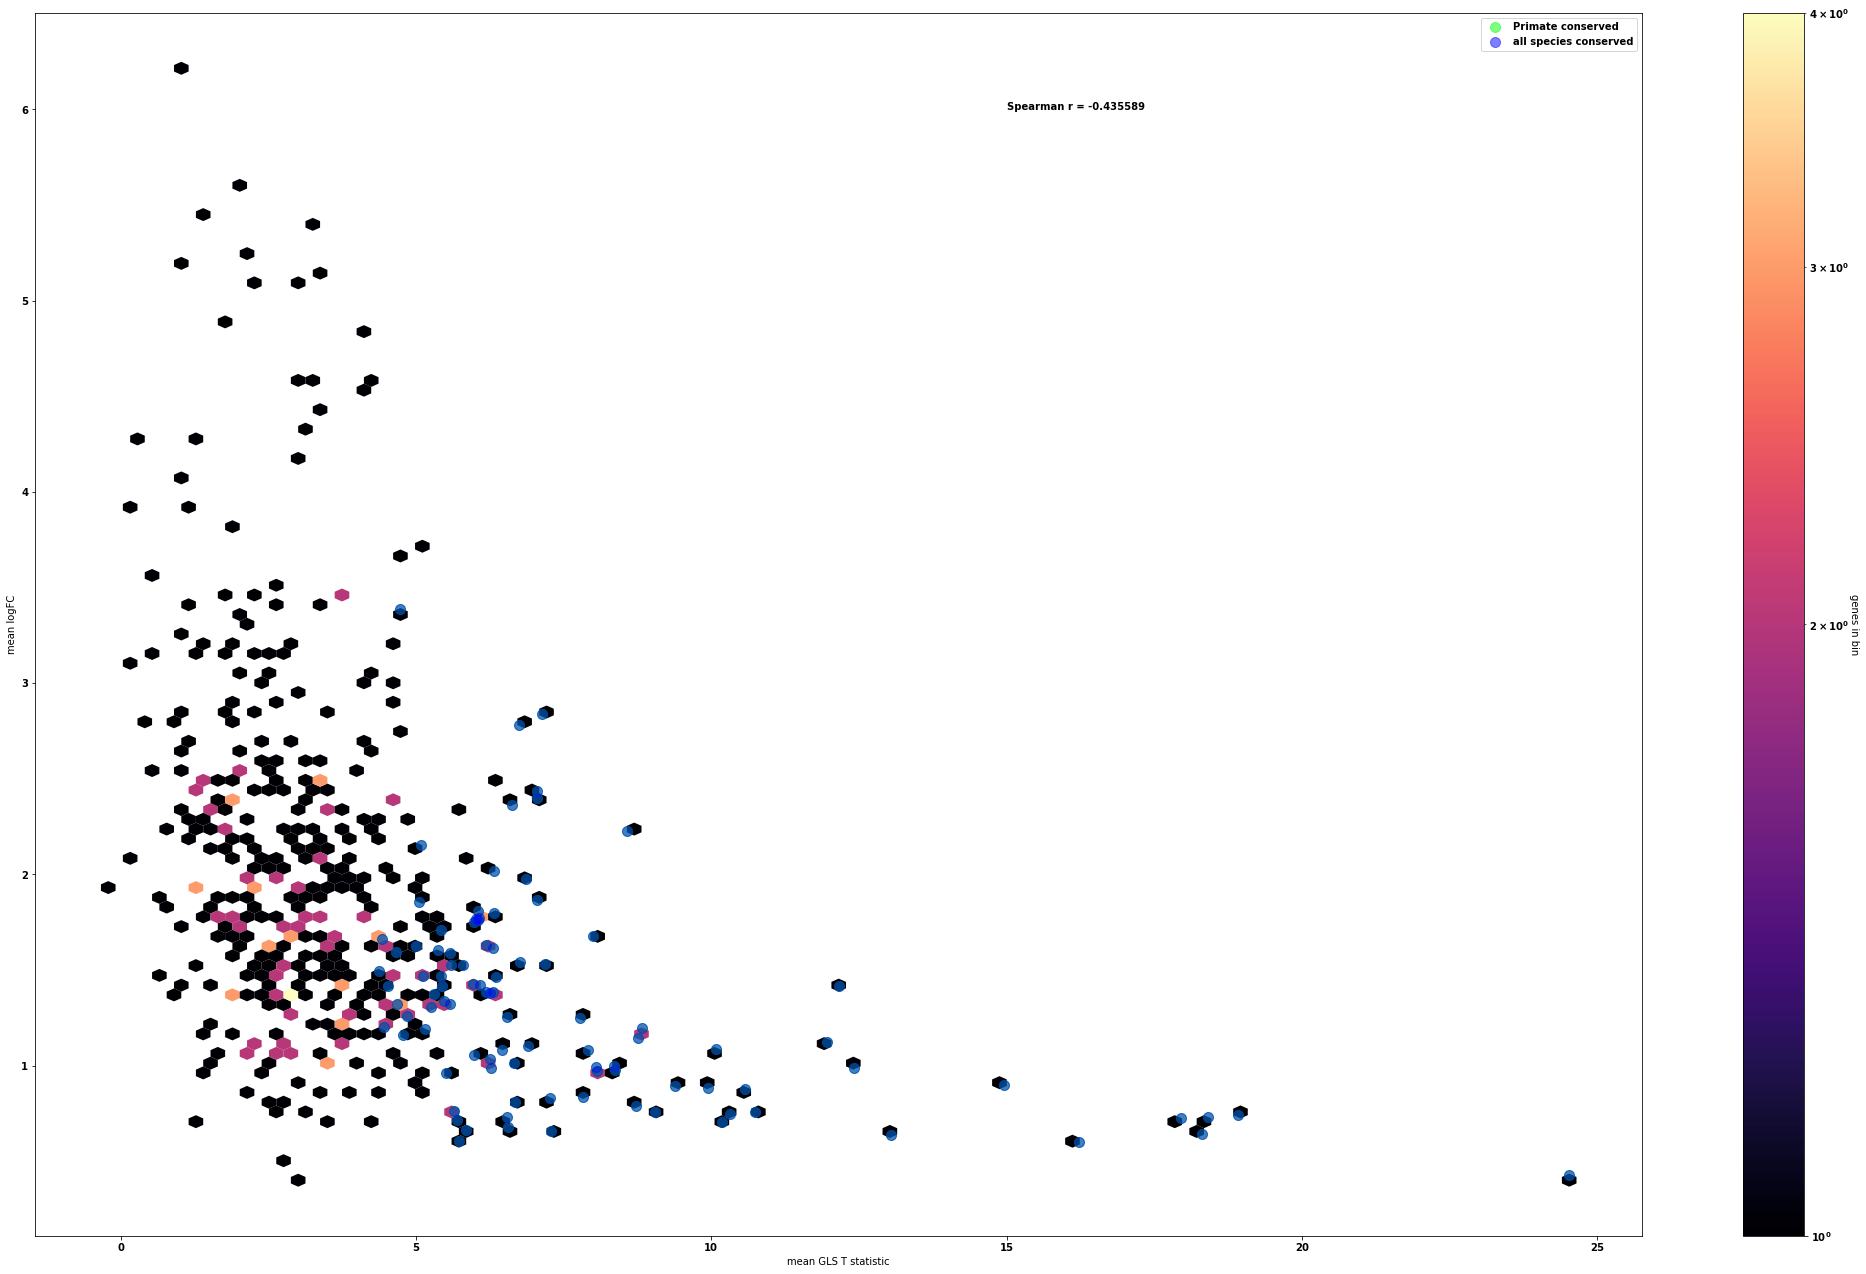

In [38]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
p_cons = []
a_cons = []
p_ = []
a_ = []
for pair in pairs_use:
    spec1, spec2 = pair
    if 'mouse' in pair:
        continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/logcpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('Unnamed: 0')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    a_.append(stats.index[stats.fdr < .05].values)
    if "mouse" not in pair:
        p_.append(stats.index[stats.fdr < .05].values)
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
    a_cons.append(stats.index[stats.fdr < .05].values)
    if "mouse" not in pair:
        p_cons.append(stats.index[stats.fdr < .05].values)
        
a_cons = list_intersection(a_cons)
p_cons = list_intersection(p_cons)

div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
a_scatter = cons.index.isin(a_cons)
p_scatter = cons.index.isin(p_cons)

ax.scatter(x[p_scatter], y[p_scatter], c='lime', s=100, alpha= .5, label='Primate conserved')
ax.scatter(x[a_scatter], y[a_scatter], c='blue', s=100, alpha= .5, label='all species conserved')
ax.legend()

plt.savefig("../../figures/atac_cons_vs_div_global_cons_highlight.pdf", transparent=True, dpi=500)

343400 343400


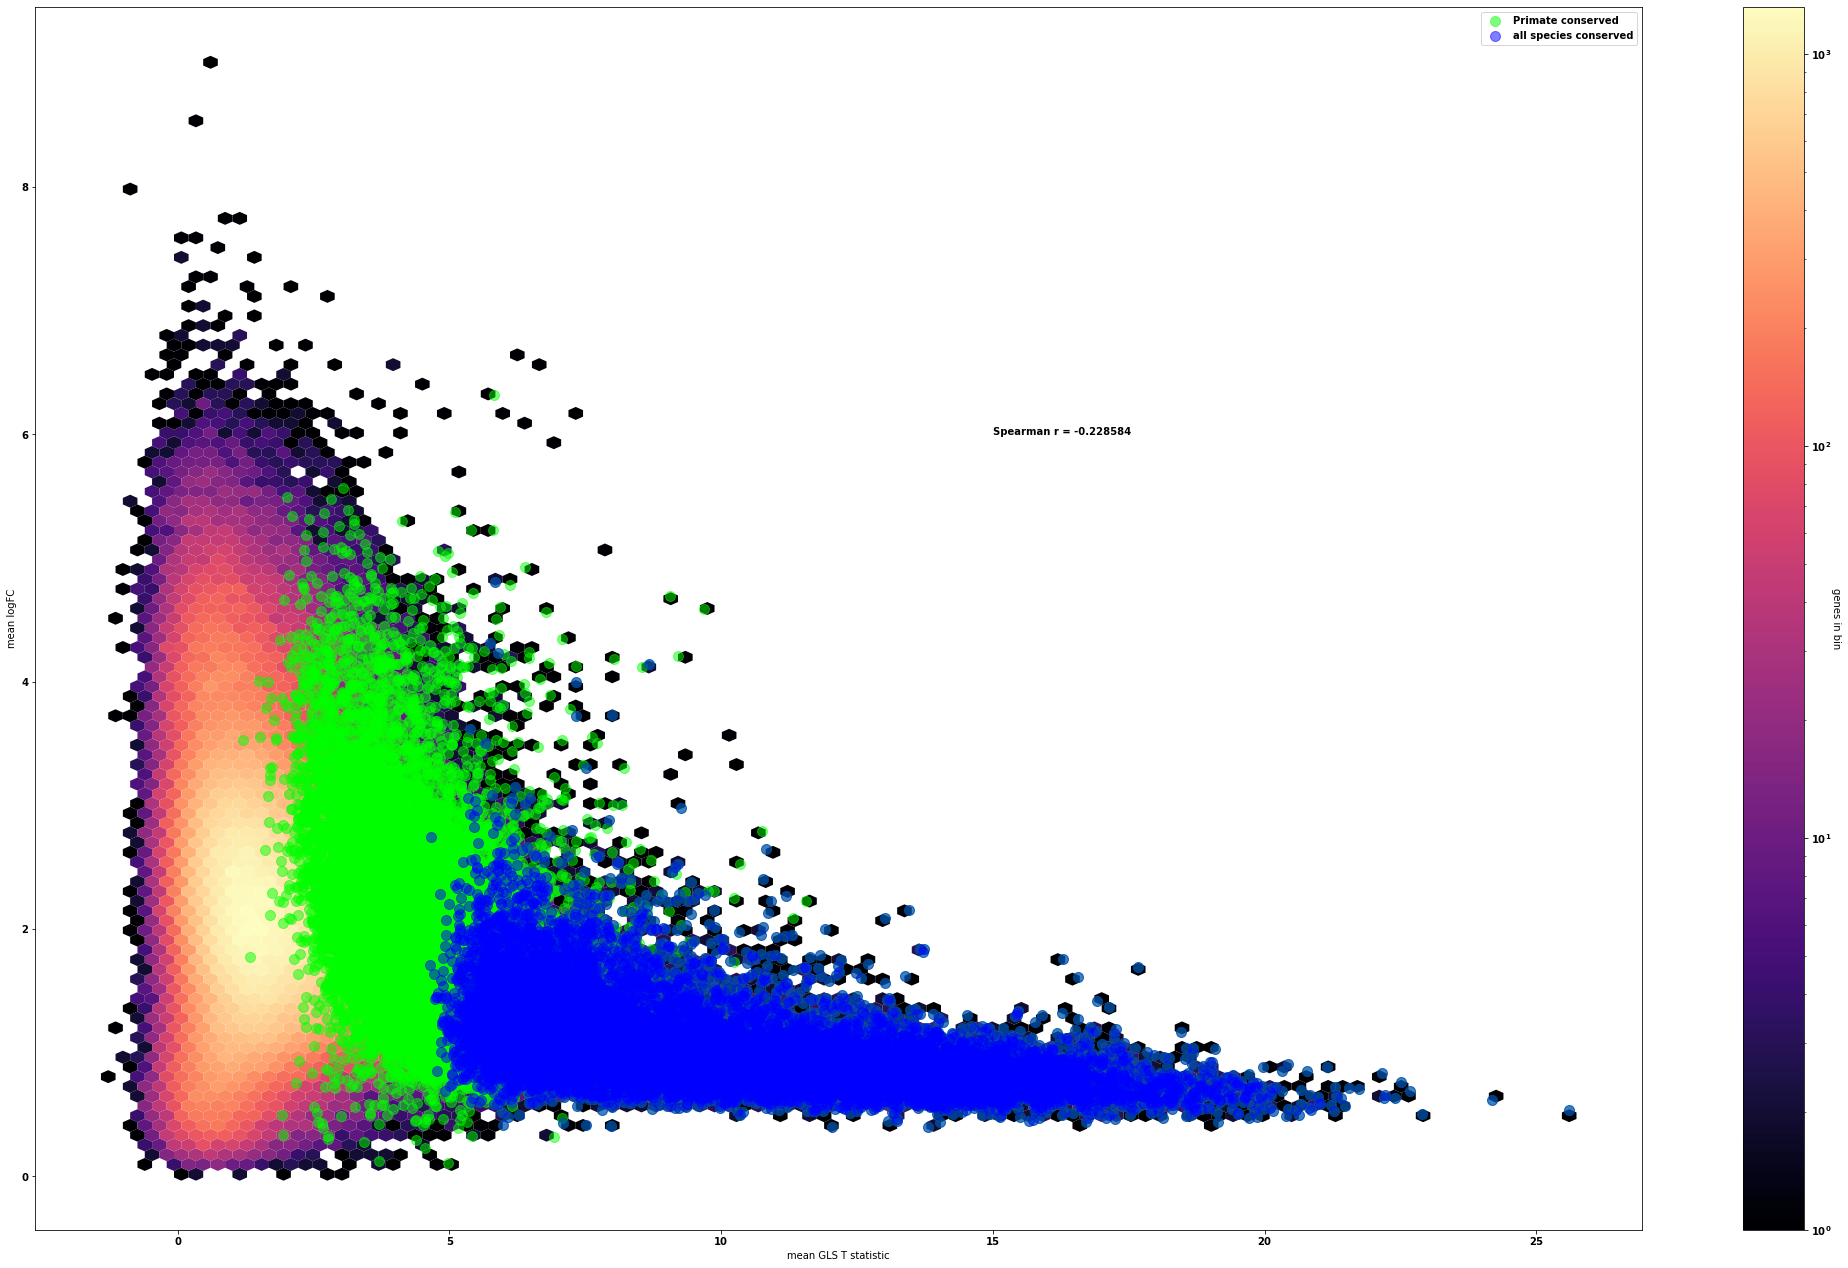

In [16]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
div = []
cons = []
p_cons = []
a_cons = []
p_ = []
a_ = []
for pair in pairs_use:
    spec1, spec2 = pair
    # if 'mouse' in pair:
    #     continue
    stats = pd.read_csv('../../data/outputs/atac_gls_results/logcpm/gls_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('Unnamed: 0')
    de = pd.read_csv(out_f.format(test_use, spec1, spec2), sep='\t').set_index('Unnamed: 0')
    a_.append(stats.index[stats.fdr < .05].values)
    if "mouse" not in pair:
        p_.append(stats.index[stats.fdr < .05].values)
    stats, de = common_index(stats, de)
    div.append(de.abs().max(axis=1))
    cons.append(stats.t_val)
    a_cons.append(stats.index[stats.fdr < .05].values)
    if "mouse" not in pair:
        p_cons.append(stats.index[stats.fdr < .05].values)
        
a_cons = list_intersection(a_cons)
p_cons = list_intersection(p_cons)

div = pd.concat(div, axis=1)
cons = pd.concat(cons, axis=1)

x = cons.mean(axis=1)
y = div.mean(axis=1)

print(len(x), len(y))

r = spearmanr(x, y, nan_policy='omit')[0]
im = ax.hexbin(x, y, cmap='magma', bins='log', linewidths=0)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('genes in bin',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('mean GLS T statistic')
ax.set_ylabel('mean logFC')
ax.text(15, 6, 'Spearman r = {:4f}'.format(r))
a_scatter = cons.index.isin(a_cons)
p_scatter = cons.index.isin(p_cons)

ax.scatter(x[p_scatter], y[p_scatter], c='lime', s=100, alpha= .5, label='Primate conserved')
ax.scatter(x[a_scatter], y[a_scatter], c='blue', s=100, alpha= .5, label='all species conserved')
ax.legend()

plt.savefig("../../figures/atac_cons_vs_div_global_cons_highlight.pdf", transparent=True, dpi=500)

In [17]:
np.sum(p_scatter), np.sum(a_scatter)

(30145, 11910)

In [18]:
np.sum(p_scatter) -  np.sum(a_scatter)

18235

In [19]:
len(list_intersection(a_)), len(list_intersection(p_))

(11910, 30149)